# Q4 LINEAR REGRESSION

# Importing Library

In [32]:
import pandas as pan
import numpy as num
from scipy.spatial import distance 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


# Taking data into CSV and dropping column

In [33]:
training=pan.read_csv('weather.csv',header=0) 
ansg=training.iloc[0:,4]
training=training.drop(training.columns[[10]], axis=1)
training=training.drop(training.columns[[4]], axis=1)
training=training.drop(training.columns[[2]], axis=1)
training=training.drop(training.columns[[1]], axis=1)
training=training.drop(training.columns[[0]], axis=1)
print(training)

       Temperature (C)  Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  \
0             9.472222      0.89            14.1197                     251   
1             9.355556      0.86            14.2646                     259   
2             9.377778      0.89             3.9284                     204   
3             8.288889      0.83            14.1036                     269   
4             8.755556      0.83            11.0446                     259   
...                ...       ...                ...                     ...   
77280        28.838889      0.32            12.2038                      21   
77281        26.016667      0.43            10.9963                      31   
77282        24.583333      0.48            10.0947                      20   
77283        22.038889      0.56             8.9838                      30   
77284        21.522222      0.60            10.5294                      20   

       Visibility (km)  Pressure (millibars)  
0   

# Feature Scaling

In [34]:
train=pan.DataFrame(training).to_numpy()
print(train.shape)
#print(type(train))
scaler=MinMaxScaler()
train=scaler.fit_transform(train)
print(train)

(77285, 6)
[[0.50697507 0.89       0.2211296  0.69916435 0.983      0.97013513]
 [0.50508505 0.86       0.22339889 0.72144847 0.983      0.97061297]
 [0.50544505 0.89       0.06152295 0.56824513 0.929      0.97090923]
 ...
 [0.75177752 0.48       0.1580938  0.05571031 0.966      0.9701638 ]
 [0.71055711 0.56       0.14069592 0.08356546 1.         0.97064164]
 [0.70218702 0.6        0.16490166 0.05571031 1.         0.97091879]]


# Adding column of 1 for regression coefficient

In [35]:
train=num.append(num.ones((len(train),1)),train,axis=1)
##print(train)
ans=pan.DataFrame(ansg).to_numpy()

# Initializing regression coefficient

In [36]:
theta=num.array([[1,1,1,1,1,1,1]])    
theta=theta.T
m=len(ans)
predictions=train.dot(theta)
print(predictions)

[[5.27040415]
 [5.26354538]
 [4.92512235]
 ...
 [4.38174542]
 [4.46546012]
 [4.49371778]]


# Gradient Descent

In [37]:
all_cost=[]
x=[0.1,0.01,0.2]
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
for i in x:
    c3e=[]
    for it in range(0,50000):
        rt=0
        predictions=train.dot(theta)
        w=(train.T.dot(predictions-ans))
        w=i*w
        w=(1/m)*w
        theta=theta-w
        w1=num.sum((predictions-ans)**2)
        w1=(1/2*m)*w1
        c=w1
        rt=mean_squared_error(ans,predictions)
        print(rt)
        c3e.append(rt)
    all_cost.append(c3e)

# print(predictions)
# print(all_cost[2])

151.60084623041166
126.80788089761118
115.7558807025151
110.52605719341337
107.76735618536549
106.06162188810859
104.80863158680516
103.75428344274746
102.79094295609772
101.87295692948929
100.98090206762282
100.10645627647932
99.24599672828008
98.39789077205191
97.56134952058838
96.73594270481566
95.92139335254112
95.11749087897068
94.32405428512662
93.54091656048429
92.76791805884892
92.00490367176752
91.25172160930246
90.50822286135956
89.77426094737348
89.04969178838222
88.33437363125141
87.62816699532117
86.93093462888967
86.24254147020166
85.56285461068057
84.89174325944164
84.22907870867276
83.57473429970361
82.9285853896815
82.29050931881389
81.66038537815636
81.03809477793115
80.42352061636588
79.81654784904242
79.21706325874773
78.62495542581746
78.0401146989653
77.46243316658874
76.89180462854469
76.32812456838617
75.77129012605336
75.22120007101098
74.67775477582484
74.14085619017077
73.61040781526782
73.08631467873025
72.56848330982977
72.05682171516287
71.55123935471536
7

16.13984578389083
16.103515268077263
16.067317272192906
16.031251134887103
15.995316199301588
15.959511813028161
15.923837328066867
15.888292100784692
15.85287549187476
15.817586866316072
15.782425593333674
15.74739104635936
15.712482602992889
15.677699644963555
15.643041558092346
15.608507732254536
15.574097561342663
15.539810443230062
15.50564577973472
15.471602976583682
15.437681443377793
15.403880593556911
15.37019984436553
15.336638616818783
15.303196335668915
15.269872429372063
15.236666330055503
15.20357747348529
15.170605299034158
15.137749249649996
15.105008771824512
15.07238331556236
15.0398723343506
15.00747528512853
14.975191628257823
14.943020827493099
14.910962349952708
14.879015666089993
14.847180249664762
14.815455577715152
14.78384113052981
14.75233639162038
14.72094084769428
14.68965398862785
14.658475307439744
14.627404300264645
14.596440466327278
14.565583307916716
14.534832330360976
14.504187042001877
14.473646954170219
14.443211581161176
14.41288044021005
14.38265

7.089974114181821
7.0809083153369
7.071863220542175
7.062838766476563
7.053834890060643
7.044851528455569
7.0358886190619545
7.026946099518785
7.018023907702337
7.0091219817250785
7.000240259934614
6.991378680912592
6.982537183473651
6.973715706664358
6.964914189762152
6.956132572274301
6.947370793936846
6.938628794713576
6.929906514794985
6.921203894597251
6.912520874761215
6.903857396151355
6.895213399854789
6.886588827180252
6.877983619657109
6.869397719034351
6.860831067279605
6.852283606578156
6.843755279331957
6.83524602815866
6.826755795890639
6.818284525574029
6.80983216046777
6.801398644042648
6.792983919980333
6.784587932172457
6.776210624719647
6.767851941930618
6.7595118283212114
6.7511902286134875
6.742887087734806
6.7346023508169
6.72633596319496
6.718087870406746
6.7098580181916665
6.701646352489878
6.6934528194414185
6.685277365385281
6.677119936858557
6.6689804805955495
6.660858943526888
6.652755272778667
6.6446694156715855
6.636601319720067
6.62855093263142
6.62051820

4.4087667581587295
4.405051802959108
4.401343050047751
4.397640485191679
4.393944094197984
4.390253862913697
4.386569777225652
4.382891823060358
4.379219986383861
4.375554253201618
4.3718946095583595
4.368241041537967
4.364593535263336
4.360952076896252
4.357316652637257
4.353687248725523
4.350063851438723
4.346446447092909
4.342835022042372
4.339229562679534
4.335630055434804
4.332036486776462
4.328448843210541
4.324867111280682
4.321291277568025
4.317721328691091
4.31415725130564
4.310599032104564
4.307046657817758
4.303500115212006
4.299959391090847
4.296424472294463
4.29289534569956
4.289371998219247
4.285854416802908
4.2823425884361015
4.278836500140421
4.275336138973394
4.271841492028358
4.268352546434339
4.264869289355945
4.26139170799324
4.257919789581641
4.2544535213917865
4.250992890729435
4.247537884935342
4.244088491385158
4.2406446974893015
4.237206490692852
4.23377385847544
4.230346788351133
4.22692526786832
4.223509284609609
4.220098826191705
4.216693880265308
4.21329443

3.2086422576636724
3.2067089842427356
3.204778187168532
3.2028498618955497
3.200924003888932
3.1990006086244467
3.197079671588461
3.1951611882779094
3.1932451542002687
3.1913315648735274
3.1894204158261554
3.187511702597082
3.185605420735665
3.1837015658016563
3.181800133365185
3.179901119006723
3.178004518317058
3.1761103268972684
3.1742185403586936
3.172329154322903
3.170442164421676
3.168557566296972
3.1666753556009
3.164795527995696
3.16291807915369
3.1610430047572864
3.1591703004989338
3.157299962081095
3.1554319852162243
3.153566365626742
3.151703099045002
3.1498421812132706
3.1479836078836994
3.1461273748182963
3.1442734777889005
3.142421912577158
3.1405726749744947
3.138725760782086
3.1368811658108413
3.135038885881365
3.133198916823941
3.1313612544785028
3.129525894694605
3.1276928333314093
3.12586206625764
3.124033589351577
3.1222073985010192
3.1203834896032654
3.1185618585650854
3.116742501302694
3.1149254137417324
3.113110591817236
3.111298031473611
3.109487728664614
3.1076

2.4938551873406105
2.49274149114282
2.4916289216092924
2.4905174771468075
2.4894071561652757
2.4882979570777297
2.4871898783003163
2.48608291825229
2.484977075356004
2.483872348036903
2.4827687347235203
2.4816662338474633
2.4805648438434145
2.4794645631491137
2.4783653902053615
2.477267323456005
2.4761703613479327
2.475074502331068
2.4739797448583625
2.4728860873857856
2.47179352837232
2.4707020662799564
2.4696116995736817
2.4685224267214743
2.4674342461942986
2.466347156466095
2.465261156013775
2.464176243317213
2.463092416859241
2.462009675125639
2.4609280166051275
2.4598474397893684
2.4587679431729454
2.4576895252533677
2.4566121845310604
2.4555359195093525
2.454460728694477
2.453386610595558
2.4523135637246107
2.4512415865965296
2.450170677729082
2.4491008356429025
2.4480320588614877
2.4469643459111845
2.44589769532119
2.4448321056235387
2.443767575353102
2.4427041030475722
2.441641687247468
2.440580326496119
2.4395200193396605
2.43846076432703
2.437402560009958
2.4363454049429643


2.063044394719283
2.062334575042775
2.06162537213957
2.0609167853309343
2.0602088139391905
2.059501457287724
2.058794714700975
2.0580885855044375
2.0573830690246626
2.0566781645892473
2.055973871526836
2.055270189167125
2.0545671168408473
2.0538646538797827
2.0531627996167487
2.0524615533855965
2.0517609145212194
2.051060882359538
2.0503614562375065
2.049662635493107
2.0489644194653476
2.048266807494261
2.047569798920904
2.0468733930873513
2.0461775893366942
2.0454823870130445
2.0447877854615264
2.044093784028272
2.043400382060427
2.042707578906145
2.0420153739145808
2.041323766435898
2.0406327558212576
2.0399423414228215
2.0392525225937477
2.038563298688191
2.0378746690612974
2.0371866330692034
2.036499190069039
2.035812339418915
2.0351260804779323
2.03444041260617
2.033755335164692
2.0330708475155386
2.0323869490217286
2.0317036390472523
2.0310209169570776
2.0303387821171386
2.0296572338943415
2.0289762716565574
2.028295894772624
2.027616102612338
2.026936894546461
2.026258269946712


1.7841664220992053
1.783689001587972
1.7832119638748407
1.782735308608738
1.7822590354390186
1.7817831440154626
1.7813076339882719
1.7808325050080773
1.7803577567259294
1.779883388793302
1.779409400862091
1.7789357925846123
1.778462563613605
1.7779897136022251
1.7775172422040475
1.7770451490730674
1.7765734338636963
1.776102096230761
1.7756311358295058
1.7751605523155911
1.7746903453450908
1.7742205145744927
1.7737510596606982
1.7732819802610214
1.772813276033186
1.7723449466353294
1.7718769917259993
1.771409410964153
1.7709422040091534
1.7704753705207772
1.7700089101592047
1.7695428225850238
1.7690771074592302
1.7686117644432229
1.7681467931988073
1.7676821933881923
1.7672179646739916
1.7667541067192194
1.7662906191872931
1.7658275017420315
1.765364754047654
1.7649023757687798
1.7644403665704296
1.763978726118019
1.7635174540773653
1.7630565501146795
1.7625960138965724
1.7621358450900502
1.7616760433625136
1.761216608381756
1.7607575398159703
1.7602988373337376
1.7598405006040336
1.75

1.6063553231936214
1.6060177499045556
1.6056804375671763
1.605343385965006
1.605006594881779
1.6046700641014493
1.6043337934081816
1.6039977825863578
1.6036620314205712
1.6033265396956324
1.6029913071965638
1.6026563337086013
1.6023216190171936
1.6019871629080025
1.6016529651669031
1.60131902557998
1.600985343933533
1.6006519200140719
1.6003187536083174
1.5999858445032016
1.5996531924858677
1.599320797343669
1.5989886588641684
1.5986567768351398
1.5983251510445668
1.5979937812806404
1.5976626673317627
1.5973318089865431
1.5970012060338006
1.596670858262561
1.5963407654620598
1.596010927421738
1.595681343931246
1.5953520147804403
1.5950229397593831
1.594694118658344
1.5943655512678008
1.5940372373784315
1.5937091767811273
1.5933813692669798
1.593053814627286
1.5927265126535484
1.5923994631374763
1.5920726658709787
1.5917461206461727
1.5914198272553772
1.5910937854911138
1.5907679951461087
1.5904424560132913
1.590117167885792
1.589792130556944
1.5894673438202842
1.5891428074695493
1.5888

1.4781075769652892
1.4778682031970156
1.477629011188668
1.4773900007973926
1.477151171880458
1.4769125242952594
1.4766740578993132
1.4764357725502628
1.4761976681058702
1.4759597444240267
1.4757220013627417
1.475484438780152
1.4752470565345148
1.4750098544842105
1.4747728324877427
1.4745359904037385
1.4742993280909458
1.4740628454082363
1.4738265422146024
1.4735904183691606
1.4733544737311484
1.4731187081599242
1.4728831215149698
1.4726477136558864
1.4724124844423996
1.4721774337343527
1.4719425613917143
1.4717078672745705
1.47147335124313
1.4712390131577222
1.4710048528787962
1.4707708702669235
1.4705370651827938
1.4703034374872184
1.4700699870411282
1.4698367137055752
1.4696036173417297
1.4693706978108818
1.469137954974443
1.468905388693942
1.4686729988310285
1.4684407852474715
1.4682087478051562
1.4679768863660916
1.467745200792402
1.467513690946331
1.4672823566902418
1.4670511978866145
1.4668202143980498
1.4665894060872637
1.4663587728170924
1.46612831445049
1.4658980308505272
1.46

1.3890135649814528
1.3888415455264405
1.38866965561633
1.388497895151917
1.3883262640340746
1.3881547621637589
1.3879833894420022
1.3878121457699204
1.3876410310487073
1.3874700451796353
1.3872991880640575
1.3871284596034072
1.3869578596991958
1.3867873882530144
1.3866170451665334
1.3864468303415032
1.3862767436797512
1.3861067850831854
1.3859369544537945
1.3857672516936412
1.3855976767048717
1.3854282293897087
1.3852589096504544
1.3850897173894883
1.3849206525092705
1.384751714912338
1.3845829045013063
1.3844142211788693
1.3842456648478005
1.3840772354109492
1.3839089327712446
1.3837407568316924
1.3835727074953783
1.3834047846654645
1.3832369882451905
1.3830693181378748
1.3829017742469132
1.382734356475779
1.3825670647280222
1.3823998989072717
1.3822328589172324
1.382065944661688
1.3818991560444978
1.3817324929695995
1.3815659553410076
1.3813995430628125
1.3812332560391836
1.3810670941743655
1.380901057372681
1.3807351455385275
1.380569358576381
1.3804036963907944
1.3802381588863954
1

1.3217327172182753
1.3216112551269172
1.3214898841329026
1.3213686041673758
1.3212474151615343
1.3211263170466312
1.3210053097539705
1.3208843932149097
1.320763567360861
1.3206428321232875
1.3205221874337074
1.3204016332236908
1.3202811694248602
1.3201607959688932
1.320040512787518
1.3199203198125167
1.3198002169757246
1.3196802042090285
1.3195602814443688
1.3194404486137383
1.3193207056491831
1.3192010524828004
1.3190814890467413
1.3189620152732089
1.3188426310944592
1.3187233364428002
1.3186041312505914
1.3184850154502459
1.3183659889742294
1.3182470517550577
1.3181282037253013
1.3180094448175805
1.317890774964571
1.3177721940989962
1.3176537021536354
1.3175352990613172
1.3174169847549242
1.3172987591673884
1.317180622231697
1.317062573880885
1.316944614048043
1.316826742666311
1.3167089596688817
1.3165912649889981
1.3164736585599564
1.3163561403151032
1.3162387101878374
1.316121368111609
1.316004114019919
1.3158869478463209
1.315769869524418
1.3156528789878663
1.3155359761703718
1.3

1.2735158968703786
1.2734305608736556
1.2733452887575127
1.2732600804739598
1.2731749359750435
1.2730898552128462
1.273004838139487
1.2729198847071226
1.2728349948679434
1.272750168574179
1.2726654057780937
1.2725807064319876
1.272496070488199
1.2724114978991004
1.2723269886171007
1.2722425425946464
1.2721581597842189
1.2720738401383356
1.2719895836095512
1.2719053901504553
1.2718212597136733
1.2717371922518672
1.271653187717736
1.2715692460640111
1.2714853672434643
1.2714015512088999
1.2713177979131596
1.271234107309121
1.2711504793496955
1.2710669139878341
1.2709834111765193
1.2708999708687714
1.2708165930176465
1.270733277576236
1.2706500244976673
1.2705668337351024
1.2704837052417393
1.2704006389708122
1.2703176348755898
1.2702346929093773
1.2701518130255132
1.2700689951773751
1.2699862393183732
1.2699035454019532
1.2698209133815965
1.2697383432108211
1.2696558348431783
1.2695733882322549
1.269491003331675
1.269408680095095
1.2693264184762094
1.2692442184287447
1.269162079906465
1.

1.2405367384053265
1.2404760785747646
1.2404154641137821
1.240354894988389
1.240294371164619
1.2402338926085328
1.2401734592862155
1.2401130711637787
1.2400527282073595
1.2399924303831196
1.2399321776572472
1.2398719699959548
1.2398118073654825
1.2397516897320935
1.239691617062077
1.2396315893217484
1.239571606477448
1.2395116684955412
1.2394517753424192
1.239391926984498
1.2393321233882193
1.2392723645200499
1.2392126503464818
1.239152980834032
1.2390933559492445
1.2390337756586849
1.2389742399289478
1.23891474872665
1.2388553020184356
1.2387958997709723
1.2387365419509537
1.2386772285250982
1.2386179594601499
1.2385587347228761
1.2384995542800716
1.2384404180985542
1.238381326145168
1.2383222783867813
1.2382632747902877
1.2382043153226059
1.2381453999506788
1.238086528641474
1.2380277013619863
1.2379689180792315
1.2379101787602538
1.2378514833721201
1.2377928318819233
1.2377342242567801
1.2376756604638326
1.2376171404702472
1.2375586642432148
1.237500231749953
1.2374418429577003
1.23

1.216790187412193
1.216747284529413
1.2167044137218639
1.2166615749655454
1.2166187682364762
1.216575993510693
1.2165332507642497
1.2164905399732189
1.2164478611136904
1.2164052141617727
1.2163625990935922
1.2163200158852925
1.2162774645130354
1.2162349449530014
1.216192457181387
1.2161500011744082
1.216107576908299
1.2160651843593098
1.2160228235037103
1.215980494317787
1.2159381967778438
1.2158959308602042
1.2158536965412077
1.2158114937972115
1.2157693226045927
1.215727182939743
1.2156850747790746
1.2156429980990158
1.215600952876013
1.2155589390865298
1.215516956707049
1.2154750057140682
1.2154330860841065
1.2153911977936964
1.215349340819392
1.2153075151377615
1.2152657207253927
1.215223957558891
1.215182225614878
1.215140524869995
1.2150988553008981
1.2150572168842622
1.2150156095967815
1.2149740334151642
1.2149324883161385
1.214890974276449
1.2148494912728582
1.2148080392821459
1.2147666182811097
1.214725228246563
1.2146838691553383
1.2146425409842851
1.2146012437102705
1.214559

1.2005749804128774
1.2005441991689467
1.2005134409333622
1.200482705688919
1.200451993418424
1.2004213041046974
1.2003906377305742
1.2003599942788992
1.2003293737325318
1.2002987760743449
1.2002682012872217
1.200237649354061
1.2002071202577729
1.2001766139812804
1.2001461305075196
1.2001156698194388
1.2000852319000002
1.2000548167321776
1.200024424298958
1.1999940545833414
1.1999637075683398
1.1999333832369792
1.1999030815722966
1.1998728025573435
1.1998425461751823
1.1998123124088893
1.1997821012415537
1.199751912656276
1.1997217466361703
1.1996916031643636
1.1996614822239946
1.1996313837982155
1.1996013078701906
1.1995712544230972
1.1995412234401246
1.1995112149044753
1.1994812287993637
1.199451265108018
1.1994213238136777
1.199391404899595
1.1993615083490354
1.1993316341452758
1.1993017822716068
1.1992719527113311
1.1992421454477638
1.1992123604642317
1.1991825977440758
1.199152857270648
1.1991231390273136
1.19909344299745
1.1990637691644466
1.1990341175117063
1.199004488022644
1.19

1.1883936667956494
1.1883719903465335
1.1883503300984817
1.1883286860393838
1.188307058157138
1.1882854464396504
1.1882638508748378
1.1882422714506244
1.1882207081549454
1.1881991609757434
1.1881776299009703
1.1881561149185873
1.1881346160165651
1.1881131331828823
1.1880916664055272
1.1880702156724976
1.188048780971799
1.1880273622914461
1.1880059596194632
1.187984572943884
1.18796320225275
1.187941847534112
1.18792050877603
1.1878991859665726
1.1878778790938174
1.1878565881458516
1.18783531311077
1.187814053976678
1.187792810731688
1.1877715833639226
1.1877503718615128
1.1877291762125985
1.1877079964053288
1.1876868324278615
1.1876656842683633
1.1876445519150085
1.1876234353559825
1.1876023345794788
1.1875812495736975
1.187560180326851
1.1875391268271591
1.1875180890628483
1.187497067022158
1.1874760606933328
1.1874550700646276
1.1874340951243065
1.187413135860642
1.1873921922619144
1.187371264316414
1.18735035201244
1.1873294553382983
1.187308574282307
1.1872877088327891
1.1872668589

1.1801385721627398
1.1801230654487516
1.1801075703239885
1.1800920867797886
1.1800766148074957
1.1800611543984605
1.1800457055440403
1.1800302682355992
1.1800148424645056
1.1799994282221375
1.1799840254998777
1.1799686342891154
1.179953254581246
1.1799378863676724
1.1799225296398026
1.1799071843890523
1.1798918506068425
1.179876528284602
1.1798612174137642
1.1798459179857703
1.1798306299920678
1.1798153534241098
1.1798000882733561
1.1797848345312736
1.1797695921893343
1.1797543612390178
1.17973914167181
1.1797239334792016
1.179708736652691
1.1796935511837836
1.1796783770639896
1.1796632142848262
1.1796480628378174
1.1796329227144928
1.1796177939063888
1.1796026764050476
1.1795875702020184
1.1795724752888568
1.1795573916571238
1.1795423192983872
1.179527258204221
1.179512208366207
1.1794971697759304
1.1794821424249844
1.179467126304969
1.1794521214074896
1.1794371277241578
1.1794221452465916
1.1794071739664158
1.1793922138752615
1.1793772649647645
1.179362327226569
1.179347400652324
1.1

1.1741115062022143
1.1741005038666024
1.1740895097535806
1.1740785238570042
1.1740675461707324
1.1740565766886286
1.174045615404561
1.1740346623124036
1.1740237174060326
1.174012780679331
1.1740018521261844
1.1739909317404849
1.1739800195161276
1.1739691154470133
1.1739582195270468
1.173947331750137
1.173936452110199
1.1739255806011502
1.1739147172169142
1.1739038619514186
1.1738930147985953
1.1738821757523816
1.1738713448067182
1.173860521955551
1.1738497071928302
1.1738389005125112
1.1738281019085526
1.1738173113749184
1.173806528905577
1.173795754494502
1.1737849881356694
1.173774229823062
1.1737634795506655
1.1737527373124717
1.1737420031024755
1.1737312769146766
1.17372055874308
1.1737098485816932
1.1736991464245308
1.1736884522656095
1.1736777660989524
1.1736670879185853
1.173656417718541
1.1736457554928532
1.173635101235563
1.1736244549407147
1.1736138166023578
1.173603186214545
1.1735925637713347
1.1735819492667894
1.1735713426949748
1.1735607440499634
1.1735501533258301
1.1735

1.1698273572769304
1.1698195566767249
1.1698117619062198
1.169803972961059
1.1697961898368885
1.169788412529358
1.1697806410341203
1.1697728753468317
1.1697651154631517
1.1697573613787429
1.1697496130892702
1.1697418705904041
1.1697341338778162
1.1697264029471823
1.169718677794181
1.1697109584144945
1.1697032448038076
1.1696955369578097
1.1696878348721917
1.169680138542649
1.1696724479648797
1.1696647631345845
1.1696570840474692
1.1696494106992403
1.1696417430856096
1.1696340812022912
1.1696264250450017
1.1696187746094635
1.1696111298913987
1.1696034908865345
1.1695958575906025
1.1695882299993343
1.1695806081084672
1.169572991913741
1.1695653814108988
1.1695577765956866
1.169550177463854
1.1695425840111526
1.1695349962333386
1.1695274141261707
1.1695198376854117
1.1695122669068252
1.169504701786181
1.16949714231925
1.1694895885018068
1.1694820403296293
1.169474497798498
1.169466960904198
1.1694594296425156
1.1694519040092424
1.1694443840001703
1.1694368696110975
1.1694293608378226
1.16

1.1667183359405335
1.1667128588282933
1.1667073858092911
1.1667019168804686
1.1666964520387677
1.1666909912811338
1.166685534604516
1.1666800820058627
1.1666746334821276
1.1666691890302654
1.1666637486472324
1.1666583123299878
1.1666528800754932
1.166647451880712
1.1666420277426106
1.1666366076581571
1.1666311916243226
1.1666257796380792
1.1666203716964016
1.166614967796268
1.1666095679346578
1.1666041721085523
1.166598780314936
1.166593392550795
1.1665880088131184
1.1665826290988968
1.166577253405123
1.1665718817287924
1.1665665140669028
1.1665611504164541
1.1665557907744488
1.1665504351378895
1.1665450835037845
1.1665397358691418
1.1665343922309728
1.1665290525862904
1.1665237169321108
1.1665183852654502
1.1665130575833305
1.1665077338827727
1.166502414160801
1.1664970984144425
1.1664917866407263
1.1664864788366829
1.1664811749993462
1.166475875125751
1.1664705792129357
1.1664652872579395
1.166459999257805
1.1664547152095768
1.166449435110301
1.1664441589570267
1.1664388867468047
1.1

1.1646442215705648
1.164640294514018
1.1646363703922886
1.1646324492031832
1.1646285309445104
1.16462461561408
1.1646207032097036
1.1646167937291945
1.1646128871703674
1.164608983531039
1.1646050828090269
1.164601185002152
1.1645972901082353
1.1645933981250989
1.1645895090505682
1.1645856228824698
1.1645817396186313
1.1645778592568827
1.1645739817950538
1.1645701072309782
1.1645662355624908
1.1645623667874272
1.164558500903625
1.1645546379089233
1.1645507778011632
1.1645469205781873
1.1645430662378389
1.164539214777965
1.1645353661964122
1.164531520491029
1.1645276776596665
1.1645238377001763
1.164520000610413
1.164516166388232
1.164512335031489
1.1645085065380436
1.1645046809057555
1.1645008581324867
1.1644970382161004
1.1644932211544614
1.1644894069454366
1.164485595586894
1.1644817870767037
1.164477981412736
1.164474178592864
1.164470378614964
1.1644665814769095
1.1644627871765798
1.1644589957118539
1.1644552070806122
1.1644514212807375
1.164447638310114
1.1644438581666268
1.1644400

1.1631011778626723
1.1630984039718941
1.1630956321541313
1.163092862407835
1.163090094731456
1.163087329123448
1.1630845655822655
1.1630818041063635
1.1630790446941988
1.163076287344229
1.1630735320549128
1.1630707788247105
1.1630680276520833
1.1630652785354927
1.1630625314734033
1.163059786464279
1.1630570435065861
1.1630543025987905
1.163051563739361
1.163048826926767
1.1630460921594779
1.163043359435966
1.1630406287547037
1.1630379001141644
1.163035173512824
1.1630324489491572
1.163029726421642
1.1630270059287566
1.1630242874689807
1.1630215710407943
1.1630188566426787
1.1630161442731188
1.1630134339305969
1.1630107256135978
1.1630080193206092
1.163005315050117
1.1630026128006112
1.16299991257058
1.1629972143585154
1.1629945181629084
1.1629918239822525
1.162989131815042
1.162986441659772
1.1629837535149385
1.1629810673790395
1.1629783832505738
1.1629757011280406
1.1629730210099412
1.1629703428947782
1.1629676667810531
1.162964992667272
1.1629623205519393
1.1629596504335609
1.1629569

1.16202697065911
1.162024999556548
1.1620230299270509
1.1620210617695181
1.1620190950828495
1.162017129865946
1.1620151661177098
1.1620132038370417
1.1620112430228462
1.1620092836740266
1.162007325789489
1.1620053693681378
1.1620034144088802
1.1620014609106233
1.1619995088722752
1.1619975582927449
1.1619956091709425
1.161993661505778
1.1619917152961636
1.161989770541011
1.1619878272392328
1.1619858853897438
1.1619839449914575
1.1619820060432913
1.1619800685441593
1.1619781324929799
1.1619761978886707
1.16197426473015
1.161972333016338
1.1619704027461548
1.1619684739185212
1.161966546532359
1.1619646205865912
1.1619626960801424
1.1619607730119352
1.161958851380896
1.1619569311859501
1.1619550124260245
1.1619530951000467
1.1619511792069448
1.1619492647456486
1.161947351715088
1.1619454401141933
1.161943529941896
1.161941621197129
1.161939713878825
1.161937807985918
1.1619359035173433
1.1619340004720358
1.1619320988489323
1.1619301986469692
1.1619282998650855
1.1619264025022191
1.16192450

1.1612791247511147
1.1612777125365021
1.1612763013772802
1.1612748912726607
1.161273482221854
1.1612720742240739
1.1612706672785333
1.1612692613844458
1.1612678565410246
1.1612664527474856
1.1612650500030444
1.1612636483069159
1.1612622476583172
1.1612608480564657
1.1612594495005786
1.161258051989875
1.1612566555235728
1.1612552601008923
1.161253865721053
1.1612524723832762
1.1612510800867826
1.1612496888307942
1.1612482986145334
1.1612469094372229
1.161245521298087
1.1612441341963489
1.161242748131234
1.1612413631019671
1.1612399791077745
1.1612385961478828
1.1612372142215186
1.1612358333279094
1.1612344534662837
1.161233074635871
1.1612316968358989
1.1612303200655985
1.1612289443241999
1.161227569610935
1.1612261959250343
1.1612248232657305
1.1612234516322568
1.1612220810238463
1.1612207114397317
1.1612193428791493
1.1612179753413336
1.16121660882552
1.1612152433309453
1.161213878856845
1.161212515402458
1.1612111529670215
1.1612097915497739
1.1612084311499544
1.161207071766803
1.161

1.160752463886711
1.1607514452616048
1.1607504273977487
1.160749410294572
1.160748393951507
1.160747378367986
1.1607463635434405
1.1607453494773046
1.1607443361690102
1.1607433236179912
1.1607423118236826
1.1607413007855176
1.1607402905029325
1.1607392809753612
1.1607382722022404
1.1607372641830058
1.1607362569170945
1.1607352504039428
1.1607342446429887
1.1607332396336703
1.1607322353754252
1.1607312318676923
1.1607302291099109
1.1607292271015202
1.1607282258419607
1.1607272253306724
1.1607262255670965
1.1607252265506736
1.1607242282808459
1.160723230757055
1.1607222339787435
1.1607212379453542
1.1607202426563303
1.160719248111116
1.160718254309155
1.1607172612498924
1.1607162689327728
1.1607152773572411
1.1607142865227436
1.1607132964287263
1.1607123070746357
1.1607113184599205
1.1607103305840254
1.1607093434464
1.1607083570464918
1.1607073713837501
1.1607063864576241
1.1607054022675618
1.1607044188130151
1.1607034360934332
1.160702454108267
1.1607014728569678
1.1607004923389876
1.16

1.160368185211805
1.1603674537696544
1.160366722874133
1.160365992524831
1.1603652627213417
1.1603645334632562
1.1603638047501668
1.1603630765816666
1.160362348957348
1.1603616218768054
1.1603608953396314
1.1603601693454206
1.160359443893767
1.1603587189842646
1.1603579946165095
1.1603572707900955
1.160356547504619
1.1603558247596748
1.1603551025548597
1.16035438088977
1.160353659764002
1.160352939177153
1.16035221912882
1.1603514996186008
1.1603507806460933
1.160350062210895
1.1603493443126045
1.1603486269508212
1.160347910125144
1.160347193835172
1.1603464780805042
1.1603457628607423
1.160345048175485
1.160344334024333
1.160343620406888
1.16034290732275
1.1603421947715216
1.1603414827528042
1.1603407712661993
1.1603400603113097
1.160339349887738
1.1603386399950872
1.16033793063296
1.1603372218009602
1.1603365134986923
1.1603358057257591
1.1603350984817662
1.160334391766318
1.1603336855790194
1.1603329799194755
1.1603322747872922
1.1603315701820751
1.1603308661034304
1.160330162550964

1.1600943517973887
1.1600938249991224
1.160093298594548
1.1600927725833725
1.1600922469653001
1.1600917217400375
1.1600911969072916
1.1600906724667688
1.1600901484181763
1.1600896247612207
1.1600891014956098
1.1600885786210509
1.1600880561372513
1.1600875340439196
1.160087012340764
1.1600864910274926
1.1600859701038142
1.1600854495694377
1.1600849294240723
1.1600844096674268
1.1600838902992108
1.1600833713191339
1.1600828527269065
1.1600823345222389
1.1600818167048408
1.160081299274423
1.1600807822306964
1.1600802655733722
1.1600797493021613
1.1600792334167755
1.1600787179169259
1.1600782028023247
1.1600776880726842
1.1600771737277162
1.1600766597671337
1.1600761461906495
1.1600756329979762
1.160075120188827
1.1600746077629152
1.160074095719955
1.160073584059659
1.160073072781743
1.1600725618859198
1.1600720513719043
1.160071541239411
1.1600710314881548
1.160070522117851
1.1600700131282153
1.1600695045189624
1.1600689962898079
1.160068488440469
1.1600679809706607
1.1600674738800996
1.1

1.1598933505024962
1.1598929739184878
1.159892597615912
1.1598922215945584
1.1598918458542171
1.1598914703946772
1.1598910952157302
1.1598907203171644
1.1598903456987724
1.1598899713603437
1.1598895973016692
1.1598892235225398
1.1598888500227467
1.1598884768020812
1.1598881038603344
1.1598877311972986
1.1598873588127645
1.1598869867065247
1.1598866148783709
1.1598862433280954
1.15988587205549
1.1598855010603484
1.159885130342462
1.1598847599016247
1.1598843897376283
1.1598840198502667
1.1598836502393328
1.1598832809046207
1.1598829118459228
1.159882543063034
1.1598821745557473
1.1598818063238567
1.1598814383671574
1.1598810706854428
1.1598807032785077
1.159880336146147
1.1598799692881547
1.159879602704327
1.159879236394458
1.1598788703583431
1.1598785045957782
1.1598781391065582
1.1598777738904793
1.1598774089473372
1.1598770442769284
1.1598766798790485
1.1598763157534937
1.1598759519000608
1.1598755883185463
1.1598752250087476
1.1598748619704609
1.1598744992034833
1.1598741367076122
1

1.1597485882565015
1.1597483198576306
1.1597480516593417
1.1597477836614858
1.1597475158639126
1.1597472482664724
1.1597469808690157
1.1597467136713933
1.1597464466734553
1.1597461798750532
1.1597459132760377
1.1597456468762588
1.1597453806755689
1.1597451146738185
1.1597448488708593
1.159744583266542
1.1597443178607194
1.1597440526532425
1.1597437876439627
1.159743522832732
1.159743258219403
1.1597429938038275
1.159742729585858
1.1597424655653459
1.1597422017421437
1.159741938116105
1.1597416746870814
1.159741411454927
1.1597411484194935
1.159740885580634
1.159740622938202
1.1597403604920502
1.159740098242032
1.1597398361880018
1.159739574329812
1.1597393126673168
1.1597390512003696
1.1597387899288247
1.1597385288525357
1.1597382679713566
1.1597380072851418
1.1597377467937455
1.1597374864970225
1.1597372263948265
1.1597369664870132
1.1597367067734365
1.1597364472539513
1.159736187928413
1.1597359287966762
1.1597356698585968
1.1597354111140286
1.159735152562828
1.159734894204851
1.1597

1.1596482999659494
1.1596481065155029
1.1596479132096278
1.1596477200482154
1.1596475270311586
1.159647334158349
1.1596471414296792
1.1596469488450416
1.1596467564043276
1.159646564107431
1.159646371954243
1.1596461799446567
1.159645988078565
1.1596457963558608
1.1596456047764365
1.1596454133401852
1.159645222047
1.1596450308967738
1.1596448398893995
1.1596446490247712
1.1596444583027814
1.1596442677233245
1.1596440772862928
1.1596438869915804
1.1596436968390806
1.1596435068286879
1.1596433169602955
1.159643127233797
1.159642937649087
1.1596427482060594
1.1596425589046084
1.1596423697446279
1.159642180726012
1.1596419918486554
1.1596418031124527
1.1596416145172979
1.159641426063086
1.1596412377497116
1.1596410495770695
1.1596408615450546
1.159640673653561
1.1596404859024847
1.1596402982917204
1.1596401108211627
1.1596399234907078
1.1596397363002504
1.1596395492496858
1.1596393623389105
1.1596391755678181
1.159638988936306
1.1596388024442688
1.1596386160916028
1.1596384298782036
1.15963

1.159575737690499
1.1595755984679998
1.1595754593495458
1.1595753203350594
1.1595751814244626
1.159575042617678
1.1595749039146273
1.159574765315234
1.1595746268194198
1.1595744884271078
1.1595743501382205
1.1595742119526808
1.1595740738704106
1.1595739358913344
1.159573798015373
1.1595736602424511
1.159573522572491
1.1595733850054157
1.1595732475411478
1.1595731101796116
1.15957297292073
1.1595728357644257
1.1595726987106219
1.1595725617592434
1.1595724249102122
1.1595722881634527
1.159572151518888
1.1595720149764415
1.1595718785360374
1.1595717421975995
1.159571605961051
1.1595714698263166
1.1595713337933196
1.1595711978619838
1.1595710620322335
1.159570926303993
1.1595707906771868
1.1595706551517377
1.1595705197275714
1.159570384404611
1.1595702491827822
1.159570114062008
1.159569979042214
1.1595698441233242
1.1595697093052635
1.159569574587956
1.159569439971327
1.159569305455301
1.1595691710398022
1.159569036724757
1.159568902510089
1.159568768395724
1.159568634381586
1.15956850046

1.1595196633863987
1.1595195660698954
1.1595194688261194
1.1595193716550167
1.1595192745565335
1.1595191775306144
1.1595190805772053
1.159518983696253
1.1595188868877024
1.1595187901514996
1.1595186934875907
1.1595185968959218
1.1595185003764386
1.1595184039290876
1.159518307553814
1.159518211250565
1.159518115019286
1.1595180188599234
1.159517922772424
1.159517826756733
1.1595177308127982
1.1595176349405645
1.159517539139979
1.1595174434109885
1.159517347753539
1.1595172521675774
1.1595171566530493
1.1595170612099026
1.159516965838083
1.159516870537538
1.1595167753082138
1.1595166801500576
1.1595165850630156
1.159516490047035
1.1595163951020624
1.1595163002280455
1.1595162054249304
1.1595161106926644
1.1595160160311953
1.1595159214404689
1.1595158269204333
1.159515732471035
1.159515638092222
1.1595155437839408
1.159515449546139
1.159515355378764
1.159515261281763
1.1595151672550832
1.159515073298673
1.159514979412479
1.1595148855964483
1.1595147918505297
1.1595146981746702
1.159514604

1.1594822540557608
1.1594821846963634
1.1594821153888002
1.1594820461330324
1.1594819769290217
1.159481907776729
1.1594818386761165
1.1594817696271444
1.159481700629775
1.1594816316839693
1.1594815627896884
1.1594814939468943
1.159481425155549
1.1594813564156132
1.1594812877270486
1.1594812190898174
1.1594811505038811
1.1594810819692
1.1594810134857378
1.1594809450534551
1.1594808766723141
1.1594808083422763
1.1594807400633034
1.1594806718353574
1.1594806036584002
1.1594805355323938
1.1594804674573
1.1594803994330805
1.1594803314596975
1.1594802635371133
1.1594801956652896
1.1594801278441889
1.159480060073772
1.1594799923540025
1.159479924684842
1.1594798570662528
1.1594797894981967
1.1594797219806363
1.1594796545135337
1.1594795870968515
1.159479519730552
1.1594794524145968
1.1594793851489489
1.1594793179335707
1.1594792507684244
1.159479183653473
1.1594791165886786
1.1594790495740033
1.1594789826094107
1.1594789156948622
1.1594788488303212
1.15947878201575
1.159478715251111
1.1594786

1.1594556411563415
1.1594555916855553
1.1594555422517399
1.1594554928548682
1.1594554434949125
1.1594553941718442
1.159455344885637
1.159455295636263
1.1594552464236942
1.1594551972479037
1.1594551481088633
1.1594550990065464
1.1594550499409253
1.1594550009119715
1.159454951919659
1.15945490296396
1.159454854044847
1.1594548051622928
1.15945475631627
1.159454707506751
1.159454658733709
1.1594546099971168
1.159454561296947
1.1594545126331712
1.1594544640057645
1.1594544154146973
1.1594543668599444
1.1594543183414783
1.159454269859271
1.1594542214132961
1.1594541730035262
1.1594541246299344
1.1594540762924932
1.159454027991177
1.1594539797259567
1.1594539314968069
1.1594538833037005
1.15945383514661
1.1594537870255084
1.1594537389403694
1.1594536908911657
1.1594536428778712
1.1594535949004579
1.1594535469588994
1.1594534990531695
1.1594534511832406
1.159453403349087
1.1594533555506803
1.1594533077879956
1.1594532600610048
1.1594532123696821
1.1594531647140003
1.1594531170939335
1.1594530

1.159436765444639
1.159436730080233
1.1594366947422572
1.1594366594306895
1.1594366241455116
1.1594365888867035
1.1594365536542455
1.1594365184481172
1.1594364832683
1.1594364481147734
1.1594364129875183
1.159436377886515
1.1594363428117431
1.1594363077631837
1.1594362727408176
1.1594362377446248
1.1594362027745853
1.1594361678306802
1.1594361329128895
1.1594360980211942
1.159436063155574
1.1594360283160103
1.1594359935024834
1.159435958714973
1.1594359239534608
1.1594358892179275
1.1594358545083525
1.1594358198247168
1.1594357851670016
1.1594357505351869
1.1594357159292537
1.1594356813491826
1.1594356467949536
1.159435612266549
1.1594355777639482
1.1594355432871315
1.1594355088360808
1.1594354744107767
1.1594354400111992
1.1594354056373302
1.159435371289149
1.1594353369666377
1.1594353026697766
1.1594352683985465
1.1594352341529284
1.159435199932903
1.1594351657384512
1.1594351315695541
1.1594350974261922
1.1594350633083463
1.1594350292159985
1.1594349951491287
1.1594349611077177
1.15

1.1594232215186462
1.1594231962760198
1.1594231710522578
1.1594231458473465
1.1594231206612717
1.1594230954940186
1.1594230703455743
1.1594230452159235
1.1594230201050537
1.1594229950129495
1.1594229699395977
1.1594229448849835
1.1594229198490935
1.1594228948319136
1.1594228698334295
1.1594228448536283
1.1594228198924947
1.1594227949500153
1.1594227700261766
1.1594227451209638
1.1594227202343637
1.1594226953663618
1.1594226705169444
1.1594226456860979
1.1594226208738079
1.1594225960800615
1.1594225713048436
1.1594225465481411
1.1594225218099405
1.1594224970902272
1.1594224723889877
1.159422447706208
1.1594224230418742
1.1594223983959735
1.159422373768491
1.1594223491594138
1.159422324568727
1.159422299996418
1.1594222754424723
1.1594222509068768
1.1594222263896174
1.1594222018906801
1.159422177410052
1.1594221529477193
1.1594221285036679
1.1594221040778836
1.159422079670354
1.1594220552810643
1.159422030910002
1.1594220065571532
1.1594219822225036
1.1594219579060399
1.1594219336077485


1.159413771318444
1.1594137531382338
1.1594137349716092
1.1594137168185614
1.1594136986790804
1.1594136805531554
1.1594136624407758
1.1594136443419332
1.1594136262566153
1.1594136081848132
1.1594135901265175
1.159413572081717
1.1594135540504011
1.159413536032562
1.159413518028187
1.1594135000372676
1.1594134820597932
1.1594134640957545
1.15941344614514
1.1594134282079411
1.1594134102841473
1.1594133923737477
1.1594133744767336
1.1594133565930946
1.1594133387228205
1.1594133208659012
1.159413303022327
1.1594132851920882
1.1594132673751738
1.159413249571575
1.159413231781281
1.1594132140042823
1.1594131962405692
1.1594131784901314
1.159413160752959
1.1594131430290417
1.1594131253183702
1.1594131076209349
1.1594130899367248
1.159413072265731
1.159413054607943
1.1594130369633517
1.159413019331946
1.1594130017137172
1.1594129841086551
1.1594129665167494
1.159412948937991
1.1594129313723696
1.1594129138198757
1.159412896280499
1.1594128787542302
1.1594128612410588
1.1594128437409765
1.159412

1.1594066278322623
1.1594066149905915
1.1594066021585172
1.1594065893360328
1.1594065765231314
1.159406563719805
1.1594065509260474
1.1594065381418506
1.1594065253672075
1.1594065126021118
1.1594064998465556
1.1594064871005325
1.1594064743640342
1.1594064616370543
1.159406448919586
1.1594064362116219
1.1594064235131545
1.1594064108241777
1.1594063981446827
1.1594063854746643
1.1594063728141142
1.1594063601630258
1.159406347521392
1.1594063348892052
1.1594063222664597
1.159406309653147
1.1594062970492605
1.1594062844547934
1.1594062718697389
1.1594062592940892
1.1594062467278374
1.1594062341709772
1.1594062216235013
1.159406209085402
1.1594061965566727
1.1594061840373067
1.1594061715272967
1.1594061590266362
1.1594061465353176
1.1594061340533341
1.1594061215806788
1.1594061091173444
1.1594060966633244
1.1594060842186118
1.1594060717831995
1.1594060593570805
1.1594060469402476
1.1594060345326944
1.159406022134414
1.1594060097453989
1.159405997365643
1.159405984995138
1.1594059726338783
1

1.159401545757262
1.1594015367135768
1.15940152767665
1.1594015186464772
1.1594015096230528
1.1594015006063714
1.159401491596429
1.15940148259322
1.159401473596739
1.1594014646069815
1.1594014556239423
1.1594014466476164
1.1594014376779986
1.1594014287150844
1.1594014197588685
1.1594014108093453
1.1594014018665106
1.1594013929303593
1.1594013840008865
1.1594013750780865
1.1594013661619544
1.1594013572524866
1.1594013483496763
1.15940133945352
1.1594013305640114
1.159401321681147
1.1594013128049203
1.159401303935327
1.1594012950723627
1.1594012862160215
1.1594012773662996
1.1594012685231907
1.1594012596866914
1.1594012508567946
1.1594012420334976
1.1594012332167938
1.1594012244066796
1.1594012156031492
1.159401206806198
1.159401198015821
1.1594011892320133
1.1594011804547701
1.1594011716840862
1.1594011629199568
1.1594011541623774
1.159401145411343
1.159401136666848
1.159401127928888
1.1594011191974585
1.159401110472554
1.1594011017541699
1.1594010930423015
1.1594010843369436
1.15940107

1.1593981665488098
1.1593981600305077
1.1593981535170768
1.1593981470085133
1.1593981405048142
1.1593981340059758
1.159398127511994
1.1593981210228643
1.1593981145385857
1.159398108059152
1.159398101584561
1.1593980951148084
1.159398088649891
1.1593980821898047
1.1593980757345466
1.1593980692841128
1.1593980628384994
1.1593980563977029
1.1593980499617196
1.1593980435305469
1.1593980371041794
1.1593980306826153
1.1593980242658504
1.1593980178538799
1.1593980114467013
1.1593980050443122
1.159397998646707
1.159397992253883
1.1593979858658363
1.1593979794825642
1.159397973104062
1.159397966730327
1.159397960361355
1.1593979539971428
1.1593979476376868
1.1593979412829831
1.1593979349330288
1.15939792858782
1.159397922247353
1.1593979159116248
1.1593979095806308
1.1593979032543686
1.1593978969328345
1.1593978906160243
1.1593978843039348
1.1593978779965626
1.1593978716939042
1.1593978653959556
1.159397859102714
1.159397852814175
1.1593978465303363
1.159397840251193
1.1593978339767437
1.159397

1.1593955961302558
1.159395591532904
1.1593955869389878
1.1593955823485047
1.1593955777614524
1.1593955731778278
1.159395568597629
1.1593955640208529
1.1593955594474972
1.1593955548775594
1.1593955503110371
1.1593955457479268
1.159395541188227
1.1593955366319353
1.159395532079048
1.1593955275295629
1.1593955229834785
1.1593955184407916
1.159395513901499
1.1593955093655992
1.1593955048330888
1.159395500303966
1.159395495778228
1.159395491255872
1.1593954867368959
1.1593954822212968
1.159395477709072
1.15939547320022
1.1593954686947374
1.1593954641926216
1.1593954596938707
1.1593954551984815
1.159395450706452
1.1593954462177796
1.1593954417324617
1.1593954372504958
1.1593954327718796
1.1593954282966101
1.1593954238246853
1.1593954193561022
1.1593954148908592
1.1593954104289526
1.1593954059703808
1.1593954015151406
1.1593953970632305
1.1593953926146474
1.1593953881693886
1.1593953837274522
1.1593953792888352
1.159395374853535
1.1593953704215496
1.1593953659928766
1.1593953615675128
1.1593

1.1593937897089388
1.1593937864615789
1.1593937832166463
1.1593937799741383
1.1593937767340539
1.159393773496391
1.1593937702611476
1.1593937670283216
1.1593937637979121
1.1593937605699167
1.1593937573443336
1.159393754121161
1.159393750900397
1.1593937476820404
1.1593937444660884
1.1593937412525404
1.1593937380413937
1.1593937348326468
1.1593937316262979
1.1593937284223454
1.159393725220787
1.1593937220216213
1.1593937188248467
1.1593937156304608
1.1593937124384621
1.159393709248849
1.1593937060616197
1.159393702876772
1.1593936996943048
1.159393696514216
1.1593936933365034
1.1593936901611661
1.1593936869882018
1.1593936838176078
1.1593936806493843
1.159393677483528
1.159393674320038
1.1593936711589121
1.1593936680001484
1.1593936648437453
1.1593936616897014
1.159393658538014
1.1593936553886828
1.1593936522417043
1.1593936490970782
1.159393645954802
1.1593936428148743
1.159393639677293
1.1593936365420565
1.159393633409163
1.159393630278611
1.1593936271503984
1.1593936240245237
1.15939

1.1593925716409257
1.1593925693038645
1.1593925669685499
1.159392564634981
1.1593925623031553
1.1593925599730728
1.159392557644731
1.15939255531813
1.1593925529932672
1.1593925506701421
1.159392548348753
1.159392546029099
1.1593925437111783
1.15939254139499
1.1593925390805322
1.1593925367678046
1.1593925344568052
1.1593925321475327
1.1593925298399863
1.1593925275341643
1.1593925252300654
1.1593925229276882
1.1593925206270326
1.1593925183280953
1.1593925160308765
1.1593925137353744
1.1593925114415882
1.1593925091495154
1.159392506859156
1.1593925045705082
1.159392502283571
1.1593924999983427
1.1593924977148222
1.1593924954330082
1.1593924931528996
1.1593924908744946
1.1593924885977926
1.1593924863227922
1.1593924840494918
1.1593924817778902
1.1593924795079866
1.1593924772397792
1.159392474973267
1.1593924727084481
1.1593924704453227
1.159392468183888
1.1593924659241432
1.1593924636660875
1.159392461409719
1.159392459155037
1.1593924569020397
1.1593924546507266
1.1593924524010957
1.15939

1.1593916401758744
1.159391638534925
1.1593916368952017
1.1593916352567037
1.1593916336194303
1.159391631983381
1.1593916303485539
1.1593916287149484
1.1593916270825637
1.1593916254513994
1.1593916238214537
1.1593916221927265
1.159391620565216
1.1593916189389222
1.1593916173138439
1.1593916156899793
1.1593916140673293
1.159391612445891
1.1593916108256652
1.1593916092066494
1.1593916075888446
1.1593916059722482
1.1593916043568597
1.1593916027426787
1.159391601129704
1.159391599517935
1.1593915979073703
1.159391596298009
1.159391594689851
1.1593915930828944
1.1593915914771387
1.1593915898725833
1.1593915882692265
1.1593915866670683
1.1593915850661076
1.159391583466343
1.159391581867774
1.1593915802704
1.15939157867422
1.159391577079232
1.1593915754854365
1.1593915738928318
1.159391572301418
1.159391570711193
1.1593915691221561
1.1593915675343072
1.1593915659476446
1.159391564362168
1.1593915627778764
1.1593915611947687
1.159391559612844
1.1593915580321017
1.1593915564525406
1.15939155487

1.1593909930860165
1.1593909919286567
1.1593909907721616
1.1593909896165306
1.1593909884617635
1.1593909873078592
1.1593909861548168
1.159390985002637
1.159390983851318
1.159390982700859
1.1593909815512604
1.1593909804025206
1.1593909792546389
1.1593909781076155
1.159390976961449
1.1593909758161396
1.159390974671686
1.1593909735280872
1.1593909723853435
1.1593909712434538
1.159390970102417
1.1593909689622335
1.1593909678229017
1.1593909666844213
1.1593909655467922
1.1593909644100129
1.1593909632740833
1.1593909621390022
1.15939096100477
1.159390959871385
1.1593909587388476
1.1593909576071562
1.1593909564763103
1.15939095534631
1.1593909542171539
1.159390953088841
1.1593909519613723
1.1593909508347464
1.1593909497089618
1.1593909485840186
1.1593909474599156
1.159390946336654
1.1593909452142308
1.1593909440926469
1.159390942971901
1.1593909418519928
1.159390940732921
1.1593909396146855
1.1593909384972865
1.1593909373807223
1.1593909362649926
1.1593909351500966
1.159390934036034
1.1593909

1.159390558133224
1.1593905573009178
1.1593905564692324
1.1593905556381692
1.1593905548077268
1.1593905539779055
1.1593905531487032
1.1593905523201218
1.1593905514921592
1.1593905506648154
1.1593905498380896
1.159390549011982
1.1593905481864921
1.1593905473616184
1.1593905465373613
1.1593905457137206
1.159390544890695
1.1593905440682843
1.1593905432464886
1.159390542425307
1.1593905416047392
1.1593905407847844
1.1593905399654425
1.1593905391467132
1.159390538328595
1.1593905375110887
1.1593905366941935
1.1593905358779084
1.159390535062234
1.1593905342471684
1.1593905334327121
1.1593905326188645
1.159390531805626
1.1593905309929937
1.15939053018097
1.1593905293695521
1.1593905285587416
1.1593905277485368
1.1593905269389368
1.1593905261299422
1.1593905253215526
1.1593905245137666
1.1593905237065845
1.1593905229000054
1.1593905220940297
1.1593905212886557
1.159390520483884
1.1593905196797136
1.159390518876144
1.159390518073175
1.159390517270806
1.159390516469037
1.1593905156678668
1.15939

1.1593902370010696
1.159390236408754
1.1593902358168817
1.1593902352254513
1.1593902346344633
1.1593902340439164
1.159390233453811
1.1593902328641466
1.1593902322749232
1.15939023168614
1.1593902310977962
1.1593902305098926
1.1593902299224286
1.159390229335403
1.159390228748817
1.1593902281626687
1.1593902275769585
1.159390226991686
1.159390226406851
1.159390225822453
1.159390225238492
1.1593902246549672
1.1593902240718783
1.1593902234892253
1.159390222907008
1.1593902223252257
1.1593902217438778
1.159390221162965
1.159390220582486
1.1593902200024406
1.1593902194228287
1.1593902188436505
1.1593902182649045
1.1593902176865913
1.1593902171087103
1.159390216531261
1.1593902159542433
1.1593902153776572
1.1593902148015016
1.1593902142257766
1.1593902136504821
1.159390213075617
1.1593902125011821
1.1593902119271762
1.1593902113535994
1.1593902107804515
1.1593902102077316
1.1593902096354394
1.1593902090635757
1.1593902084921384
1.1593902079211287
1.1593902073505458
1.1593902067803892
1.159390

1.1593900139743811
1.1593900135487405
1.1593900131234178
1.1593900126984125
1.1593900122737257
1.1593900118493556
1.1593900114253028
1.1593900110015674
1.159390010578148
1.1593900101550452
1.1593900097322585
1.159390009309788
1.159390008887633
1.1593900084657935
1.1593900080442698
1.1593900076230605
1.1593900072021661
1.1593900067815868
1.1593900063613207
1.1593900059413695
1.1593900055217323
1.1593900051024084
1.1593900046833978
1.1593900042647005
1.1593900038463159
1.1593900034282443
1.159390003010485
1.1593900025930373
1.1593900021759018
1.1593900017590788
1.1593900013425666
1.1593900009263662
1.1593900005104762
1.1593900000948976
1.159389999679629
1.1593899992646715
1.1593899988500234
1.1593899984356855
1.1593899980216573
1.1593899976079383
1.1593899971945287
1.1593899967814278
1.1593899963686358
1.1593899959561527
1.1593899955439773
1.15938999513211
1.1593899947205504
1.159389994309299
1.159389993898354
1.159389993487717
1.1593899930773859
1.1593899926673619
1.159389992257645
1.15

1.1593898540123506
1.1593898537062541
1.1593898534003866
1.1593898530947477
1.1593898527893371
1.1593898524841546
1.1593898521791999
1.1593898518744734
1.159389851569975
1.1593898512657037
1.1593898509616594
1.1593898506578435
1.1593898503542537
1.159389850050891
1.159389849747755
1.1593898494448458
1.159389849142163
1.1593898488397056
1.1593898485374752
1.1593898482354705
1.159389847933691
1.1593898476321371
1.159389847330809
1.1593898470297057
1.159389846728828
1.1593898464281747
1.1593898461277459
1.1593898458275418
1.159389845527562
1.1593898452278066
1.1593898449282751
1.1593898446289679
1.1593898443298838
1.1593898440310235
1.159389843732386
1.159389843433972
1.1593898431357814
1.1593898428378129
1.1593898425400677
1.1593898422425448
1.159389841945244
1.1593898416481658
1.1593898413513093
1.1593898410546757
1.1593898407582623
1.159389840462071
1.1593898401661011
1.1593898398703522
1.1593898395748248
1.1593898392795177
1.1593898389844317
1.1593898386895658
1.1593898383949208
1.159

1.1593897389768428
1.1593897387567158
1.1593897385367538
1.1593897383169551
1.1593897380973213
1.1593897378778513
1.1593897376585458
1.159389737439404
1.159389737220426
1.1593897370016117
1.1593897367829609
1.1593897365644734
1.1593897363461494
1.1593897361279881
1.1593897359099903
1.1593897356921552
1.1593897354744827
1.1593897352569738
1.1593897350396263
1.159389734822442
1.1593897346054196
1.159389734388559
1.1593897341718613
1.1593897339553252
1.159389733738951
1.1593897335227388
1.1593897333066876
1.159389733090798
1.1593897328750695
1.159389732659503
1.1593897324440972
1.159389732228852
1.159389732013768
1.1593897317988449
1.159389731584082
1.1593897313694796
1.159389731155038
1.1593897309407568
1.1593897307266354
1.159389730512674
1.1593897302988725
1.1593897300852307
1.1593897298717488
1.1593897296584261
1.1593897294452629
1.1593897292322597
1.1593897290194144
1.1593897288067294
1.1593897285942028
1.1593897283818348
1.159389728169626
1.1593897279575756
1.1593897277456835
1.1593

1.159389654044406
1.1593896538877515
1.1593896537312136
1.1593896535747932
1.15938965341849
1.1593896532623031
1.159389653106233
1.1593896529502796
1.159389652794443
1.1593896526387226
1.1593896524831189
1.1593896523276312
1.15938965217226
1.1593896520170044
1.159389651861865
1.1593896517068418
1.1593896515519344
1.1593896513971425
1.1593896512424664
1.1593896510879058
1.159389650933461
1.1593896507791313
1.1593896506249173
1.1593896504708179
1.1593896503168342
1.1593896501629657
1.1593896500092118
1.1593896498555734
1.1593896497020493
1.1593896495486395
1.159389649395345
1.159389649242165
1.1593896490890996
1.1593896489361482
1.1593896487833115
1.1593896486305888
1.15938964847798
1.1593896483254855
1.1593896481731052
1.1593896480208383
1.1593896478686856
1.159389647716646
1.159389647564721
1.1593896474129086
1.1593896472612104
1.1593896471096254
1.1593896469581533
1.1593896468067943
1.159389646655549
1.1593896465044164
1.159389646353397
1.15938964620249
1.159389646051696
1.15938964590

1.1593895931563836
1.159389593045233
1.1593895929341644
1.1593895928231797
1.1593895927122775
1.1593895926014584
1.159389592490722
1.1593895923800688
1.159389592269498
1.1593895921590092
1.1593895920486037
1.1593895919382808
1.15938959182804
1.1593895917178816
1.1593895916078059
1.1593895914978123
1.1593895913879004
1.159389591278071
1.1593895911683236
1.1593895910586587
1.1593895909490752
1.1593895908395737
1.1593895907301544
1.159389590620816
1.15938959051156
1.1593895904023857
1.1593895902932927
1.1593895901842812
1.1593895900753517
1.159389589966503
1.159389589857736
1.1593895897490503
1.1593895896404456
1.1593895895319217
1.1593895894234798
1.1593895893151185
1.159389589206838
1.1593895890986385
1.1593895889905201
1.1593895888824821
1.1593895887745251
1.1593895886666488
1.1593895885588532
1.159389588451138
1.1593895883435035
1.159389588235949
1.1593895881284753
1.1593895880210818
1.1593895879137688
1.1593895878065357
1.1593895876993827
1.1593895875923097
1.159389587485317
1.159389

1.159389548388358
1.1593895483106633
1.159389548233027
1.1593895481554481
1.159389548077928
1.1593895480004655
1.159389547923061
1.159389547845714
1.1593895477684246
1.1593895476911937
1.15938954761402
1.159389547536904
1.1593895474598457
1.1593895473828453
1.1593895473059024
1.1593895472290165
1.1593895471521884
1.1593895470754179
1.1593895469987041
1.1593895469220485
1.1593895468454498
1.1593895467689082
1.1593895466924238
1.159389546615997
1.1593895465396264
1.159389546463314
1.159389546387058
1.159389546310859
1.1593895462347168
1.159389546158632
1.1593895460826038
1.1593895460066321
1.1593895459307177
1.1593895458548598
1.159389545779059
1.1593895457033143
1.159389545627626
1.159389545551995
1.1593895454764198
1.1593895454009016
1.1593895453254397
1.1593895452500342
1.1593895451746852
1.1593895450993923
1.1593895450241556
1.159389544948975
1.159389544873851
1.1593895447987834
1.159389544723771
1.159389544648815
1.1593895445739153
1.1593895444990712
1.1593895444242832
1.15938954434

1.1593895187437937
1.1593895186882535
1.1593895186327543
1.1593895185772976
1.1593895185218812
1.159389518466507
1.1593895184111738
1.1593895183558827
1.1593895183006322
1.1593895182454228
1.159389518190255
1.1593895181351286
1.1593895180800429
1.1593895180249987
1.159389517969996
1.1593895179150335
1.1593895178601124
1.159389517805233
1.1593895177503937
1.1593895176955964
1.1593895176408393
1.159389517586123
1.1593895175314481
1.1593895174768136
1.1593895174222206
1.1593895173676674
1.1593895173131559
1.1593895172586843
1.1593895172042539
1.1593895171498645
1.1593895170955155
1.159389517041207
1.159389516986939
1.1593895169327115
1.1593895168785249
1.159389516824379
1.1593895167702726
1.1593895167162072
1.159389516662182
1.1593895166081978
1.1593895165542534
1.1593895165003494
1.1593895164464854
1.1593895163926622
1.1593895163388792
1.1593895162851362
1.1593895162314332
1.1593895161777705
1.1593895161241479
1.1593895160705654
1.1593895160170227
1.1593895159635201
1.1593895159100576
1.

1.1593894973540295
1.1593894973144743
1.159389497274949
1.159389497235453
1.1593894971959864
1.1593894971565495
1.1593894971171417
1.1593894970777636
1.159389497038415
1.159389496999096
1.1593894969598064
1.159389496920546
1.1593894968813148
1.1593894968421128
1.1593894968029403
1.1593894967637972
1.1593894967246832
1.1593894966855982
1.1593894966465428
1.1593894966075162
1.1593894965685196
1.1593894965295513
1.1593894964906122
1.1593894964517026
1.1593894964128217
1.15938949637397
1.1593894963351472
1.1593894962963538
1.1593894962575892
1.1593894962188538
1.1593894961801468
1.1593894961414692
1.1593894961028202
1.1593894960642002
1.159389496025609
1.1593894959870465
1.1593894959485131
1.1593894959100084
1.1593894958715327
1.1593894958330853
1.159389495794667
1.1593894957562774
1.1593894957179163
1.1593894956795836
1.15938949564128
1.1593894956030053
1.1593894955647586
1.1593894955265407
1.1593894954883512
1.1593894954501907
1.1593894954120583
1.1593894953739545
1.159389495335879
1.159

1.1593894821487056
1.159389482120514
1.1593894820923436
1.159389482064194
1.1593894820360653
1.159389482007958
1.1593894819798714
1.159389481951806
1.1593894819237616
1.1593894818957378
1.159389481867735
1.1593894818397532
1.1593894818117922
1.1593894817838528
1.1593894817559334
1.1593894817280357
1.1593894817001582
1.1593894816723016
1.1593894816444663
1.1593894816166512
1.1593894815888575
1.1593894815610841
1.1593894815333312
1.1593894815055992
1.1593894814778885
1.1593894814501984
1.1593894814225287
1.1593894813948793
1.1593894813672514
1.1593894813396435
1.1593894813120564
1.1593894812844898
1.159389481256944
1.1593894812294188
1.1593894812019143
1.15938948117443
1.1593894811469665
1.1593894811195233
1.159389481092101
1.159389481064699
1.159389481037317
1.1593894810099563
1.1593894809826153
1.1593894809552954
1.1593894809279954
1.1593894809007161
1.1593894808734573
1.1593894808462186
1.159389480819
1.1593894807918022
1.1593894807646246
1.159389480737467
1.15938948071033
1.159389480

1.159389470853216
1.159389470833466
1.1593894708137307
1.1593894707940093
1.1593894707743035
1.1593894707546124
1.1593894707349361
1.159389470715274
1.159389470695627
1.1593894706759946
1.1593894706563768
1.1593894706367736
1.1593894706171848
1.1593894705976113
1.159389470578052
1.1593894705585075
1.1593894705389778
1.159389470519462
1.159389470499961
1.1593894704804746
1.1593894704610033
1.1593894704415462
1.1593894704221033
1.1593894704026755
1.1593894703832621
1.159389470363863
1.1593894703444785
1.1593894703251084
1.1593894703057526
1.159389470286412
1.159389470267085
1.1593894702477727
1.1593894702284753
1.159389470209192
1.159389470189923
1.1593894701706688
1.1593894701514285
1.1593894701322025
1.1593894701129914
1.1593894700937941
1.1593894700746112
1.159389470055443
1.1593894700362892
1.1593894700171494
1.1593894699980238
1.1593894699789127
1.159389469959816
1.1593894699407332
1.1593894699216651
1.1593894699026113
1.1593894698835707
1.159389469864546
1.1593894698455338
1.159389

1.159389462981514
1.159389462967646
1.1593894629537893
1.1593894629399428
1.1593894629261061
1.1593894629122803
1.1593894628984645
1.1593894628846588
1.1593894628708636
1.159389462857079
1.1593894628433044
1.1593894628295407
1.1593894628157864
1.159389462802043
1.1593894627883097
1.1593894627745867
1.1593894627608736
1.159389462747171
1.1593894627334786
1.1593894627197963
1.1593894627061248
1.159389462692463
1.159389462678812
1.1593894626651704
1.1593894626515393
1.1593894626379182
1.1593894626243078
1.159389462610707
1.1593894625971168
1.1593894625835366
1.1593894625699668
1.1593894625564067
1.159389462542857
1.1593894625293173
1.1593894625157877
1.1593894625022683
1.159389462488759
1.1593894624752599
1.1593894624617702
1.1593894624482914
1.1593894624348224
1.1593894624213639
1.1593894624079146
1.1593894623944758
1.1593894623810472
1.1593894623676286
1.1593894623542198
1.1593894623408212
1.1593894623274323
1.1593894623140537
1.159389462300685
1.1593894622873262
1.159389462273978
1.159

1.1593894576211055
1.1593894576112436
1.1593894576013895
1.1593894575915429
1.1593894575817032
1.1593894575718715
1.1593894575620465
1.159389457552229
1.159389457542419
1.1593894575326165
1.1593894575228216
1.1593894575130335
1.1593894575032526
1.1593894574934789
1.1593894574837127
1.159389457473954
1.1593894574642025
1.1593894574544583
1.1593894574447214
1.1593894574349919
1.1593894574252692
1.1593894574155545
1.1593894574058465
1.159389457396146
1.1593894573864525
1.1593894573767662
1.1593894573670873
1.1593894573574162
1.1593894573477515
1.1593894573380945
1.1593894573284445
1.1593894573188015
1.159389457309166
1.1593894572995378
1.1593894572899164
1.1593894572803023
1.1593894572706955
1.159389457261096
1.1593894572515036
1.1593894572419183
1.1593894572323395
1.1593894572227694
1.1593894572132055
1.1593894572036492
1.159389457194099
1.159389457184557
1.1593894571750216
1.1593894571654935
1.1593894571559726
1.1593894571464587
1.1593894571369519
1.1593894571274523
1.1593894571179595
1

1.1593894538232359
1.1593894538162124
1.159389453809195
1.1593894538021818
1.1593894537951743
1.1593894537881724
1.1593894537811753
1.1593894537741838
1.159389453767197
1.1593894537602154
1.1593894537532394
1.1593894537462683
1.1593894537393028
1.159389453732342
1.1593894537253868
1.1593894537184373
1.1593894537114917
1.1593894537045522
1.1593894536976175
1.1593894536906881
1.1593894536837641
1.1593894536768454
1.1593894536699316
1.1593894536630227
1.1593894536561193
1.1593894536492209
1.1593894536423277
1.1593894536354394
1.159389453628557
1.1593894536216793
1.1593894536148064
1.159389453607939
1.1593894536010765
1.1593894535942195
1.1593894535873677
1.1593894535805205
1.1593894535736788
1.1593894535668419
1.1593894535600104
1.1593894535531837
1.1593894535463627
1.1593894535395464
1.1593894535327351
1.1593894535259281
1.1593894535191278
1.159389453512332
1.1593894535055413
1.1593894534987554
1.1593894534919744
1.1593894534851992
1.1593894534784284
1.159389453471663
1.159389453464902
1

1.1593894511787572
1.15938945117371
1.1593894511686669
1.1593894511636273
1.1593894511585914
1.15938945115356
1.159389451148532
1.1593894511435072
1.159389451138487
1.1593894511334704
1.1593894511284573
1.159389451123448
1.159389451118442
1.1593894511134402
1.159389451108442
1.159389451103448
1.159389451098457
1.15938945109347
1.1593894510884872
1.1593894510835074
1.1593894510785316
1.15938945107356
1.1593894510685914
1.1593894510636267
1.1593894510586662
1.159389451053709
1.1593894510487552
1.1593894510438059
1.1593894510388596
1.1593894510339173
1.1593894510289788
1.1593894510240434
1.159389451019112
1.1593894510141844
1.1593894510092608
1.1593894510043403
1.159389450999424
1.1593894509945109
1.1593894509896019
1.1593894509846965
1.1593894509797946
1.1593894509748959
1.1593894509700013
1.1593894509651101
1.1593894509602234
1.1593894509553397
1.1593894509504596
1.1593894509455833
1.1593894509407108
1.1593894509358418
1.1593894509309763
1.1593894509261147
1.1593894509212563
1.159389450

1.1593894492135526
1.159389449209974
1.1593894492063983
1.1593894492028254
1.1593894491992556
1.1593894491956878
1.1593894491921228
1.1593894491885608
1.1593894491850008
1.1593894491814443
1.1593894491778898
1.1593894491743384
1.1593894491707895
1.159389449167243
1.1593894491636993
1.1593894491601584
1.1593894491566201
1.159389449153084
1.159389449149551
1.1593894491460204
1.1593894491424928
1.1593894491389676
1.1593894491354453
1.1593894491319254
1.1593894491284085
1.159389449124893
1.1593894491213814
1.159389449117872
1.1593894491143655
1.159389449110861
1.1593894491073593
1.1593894491038605
1.1593894491003645
1.1593894490968706
1.1593894490933798
1.1593894490898908
1.1593894490864054
1.1593894490829222
1.1593894490794412
1.1593894490759633
1.1593894490724879
1.1593894490690153
1.1593894490655448
1.159389449062077
1.1593894490586119
1.1593894490551502
1.1593894490516898
1.1593894490482326
1.159389449044778
1.1593894490413255
1.159389449037876
1.1593894490344292
1.1593894490309846
1.1

1.1593894478482554
1.1593894478456976
1.1593894478431415
1.1593894478405868
1.159389447838035
1.1593894478354845
1.1593894478329363
1.15938944783039
1.1593894478278453
1.1593894478253024
1.1593894478227618
1.159389447820223
1.159389447817686
1.1593894478151507
1.1593894478126177
1.1593894478100866
1.1593894478075573
1.1593894478050295
1.159389447802504
1.15938944779998
1.159389447797458
1.159389447794938
1.15938944779242
1.159389447789904
1.1593894477873894
1.1593894477848774
1.1593894477823665
1.159389447779858
1.1593894477773512
1.159389447774846
1.159389447772343
1.1593894477698417
1.1593894477673423
1.1593894477648452
1.1593894477623494
1.1593894477598556
1.1593894477573636
1.1593894477548736
1.1593894477523854
1.1593894477498994
1.1593894477474151
1.1593894477449322
1.159389447742452
1.1593894477399727
1.1593894477374953
1.1593894477350208
1.1593894477325473
1.159389447730076
1.159389447727606
1.1593894477251385
1.1593894477226725
1.1593894477202085
1.159389447717746
1.15938944771

1.1593894468686115
1.1593894468667856
1.159389446864961
1.159389446863138
1.1593894468613162
1.1593894468594959
1.1593894468576766
1.1593894468558592
1.159389446854043
1.159389446852228
1.1593894468504145
1.1593894468486021
1.1593894468467913
1.1593894468449817
1.1593894468431736
1.1593894468413666
1.1593894468395611
1.1593894468377572
1.1593894468359542
1.159389446834153
1.1593894468323527
1.1593894468305541
1.1593894468287569
1.159389446826961
1.1593894468251662
1.1593894468233727
1.1593894468215806
1.1593894468197898
1.1593894468180006
1.1593894468162127
1.159389446814426
1.1593894468126407
1.1593894468108568
1.159389446809074
1.1593894468072927
1.1593894468055126
1.159389446803734
1.1593894468019565
1.1593894468001806
1.1593894467984058
1.1593894467966324
1.1593894467948607
1.1593894467930899
1.1593894467913204
1.1593894467895522
1.1593894467877854
1.1593894467860204
1.1593894467842565
1.1593894467824934
1.159389446780732
1.1593894467789718
1.1593894467772128
1.1593894467754553
1.1

1.1593894461460446
1.1593894461447587
1.1593894461434742
1.15938944614219
1.159389446140907
1.159389446139625
1.159389446138344
1.159389446137064
1.159389446135785
1.1593894461345067
1.1593894461332293
1.1593894461319532
1.159389446130678
1.1593894461294036
1.1593894461281302
1.1593894461268577
1.1593894461255867
1.1593894461243157
1.1593894461230463
1.1593894461217777
1.1593894461205099
1.1593894461192433
1.159389446117977
1.1593894461167125
1.1593894461154488
1.1593894461141856
1.1593894461129237
1.1593894461116625
1.1593894461104026
1.1593894461091434
1.1593894461078853
1.1593894461066276
1.1593894461053715
1.1593894461041157
1.1593894461028615
1.1593894461016079
1.159389446100355
1.1593894460991034
1.1593894460978527
1.159389446096603
1.159389446095354
1.159389446094106
1.1593894460928589
1.159389446091613
1.159389446090368
1.1593894460891234
1.15938944608788
1.1593894460866379
1.1593894460853964
1.159389446084156
1.1593894460829162
1.1593894460816778
1.15938944608044
1.15938944607

1.1593894456508451
1.1593894456499294
1.1593894456490144
1.1593894456481
1.1593894456471865
1.159389445646273
1.159389445645361
1.1593894456444491
1.1593894456435383
1.159389445642628
1.1593894456417184
1.1593894456408094
1.159389445639901
1.1593894456389935
1.159389445638087
1.1593894456371805
1.159389445636275
1.15938944563537
1.1593894456344658
1.1593894456335627
1.1593894456326597
1.1593894456317577
1.1593894456308562
1.159389445629955
1.159389445629055
1.1593894456281557
1.1593894456272567
1.1593894456263585
1.1593894456254612
1.1593894456245646
1.1593894456236686
1.1593894456227727
1.1593894456218783
1.1593894456209841
1.1593894456200906
1.1593894456191978
1.1593894456183056
1.1593894456174143
1.1593894456165235
1.1593894456156335
1.159389445614744
1.1593894456138552
1.159389445612967
1.1593894456120797
1.1593894456111928
1.1593894456103069
1.1593894456094216
1.1593894456085365
1.159389445607652
1.159389445606769
1.159389445605886
1.1593894456050038
1.1593894456041225
1.159389445

1.1593894452910232
1.1593894452903764
1.1593894452897304
1.1593894452890843
1.1593894452884388
1.1593894452877938
1.1593894452871494
1.1593894452865052
1.1593894452858622
1.1593894452852191
1.1593894452845763
1.1593894452839346
1.159389445283293
1.1593894452826516
1.1593894452820113
1.1593894452813713
1.1593894452807318
1.1593894452800924
1.1593894452794538
1.1593894452788158
1.1593894452781777
1.1593894452775406
1.159389445276904
1.1593894452762674
1.1593894452756321
1.1593894452749964
1.1593894452743612
1.159389445273727
1.1593894452730933
1.15938944527246
1.1593894452718267
1.1593894452711944
1.1593894452705624
1.1593894452699307
1.1593894452692994
1.1593894452686688
1.1593894452680387
1.159389445267409
1.15938944526678
1.1593894452661513
1.1593894452655227
1.1593894452648952
1.1593894452642681
1.1593894452636413
1.1593894452630145
1.1593894452623885
1.1593894452617635
1.1593894452611382
1.159389445260514
1.15938944525989
1.159389445259266
1.159389445258643
1.1593894452580205
1.1593

1.1593894450396098
1.159389445039151
1.1593894450386926
1.1593894450382345
1.1593894450377762
1.1593894450373192
1.1593894450368616
1.159389445036404
1.1593894450359479
1.1593894450354911
1.1593894450350357
1.1593894450345803
1.159389445034125
1.1593894450336706
1.159389445033216
1.1593894450327618
1.1593894450323075
1.159389445031854
1.1593894450314008
1.159389445030948
1.1593894450304958
1.159389445030044
1.1593894450295918
1.1593894450291402
1.159389445028689
1.1593894450282383
1.1593894450277882
1.1593894450273379
1.1593894450268882
1.1593894450264388
1.1593894450259898
1.1593894450255406
1.1593894450250921
1.1593894450246442
1.1593894450241968
1.1593894450237492
1.159389445023302
1.159389445022855
1.1593894450224087
1.1593894450219624
1.159389445021517
1.1593894450210716
1.159389445020626
1.1593894450201814
1.1593894450197368
1.1593894450192932
1.1593894450188489
1.1593894450184057
1.1593894450179623
1.1593894450175202
1.1593894450170774
1.1593894450166353
1.1593894450161937
1.159

1.1593894448557218
1.1593894448554005
1.159389444855079
1.159389444854758
1.159389444854437
1.1593894448541167
1.1593894448537965
1.159389444853476
1.1593894448531565
1.1593894448528363
1.159389444852517
1.1593894448521984
1.1593894448518796
1.159389444851561
1.159389444851242
1.159389444850924
1.159389444850606
1.1593894448502884
1.1593894448499713
1.159389444849654
1.159389444849337
1.15938944484902
1.1593894448487034
1.1593894448483872
1.1593894448480715
1.159389444847755
1.1593894448474396
1.1593894448471243
1.1593894448468092
1.1593894448464945
1.1593894448461801
1.1593894448458655
1.1593894448455513
1.1593894448452373
1.1593894448449238
1.1593894448446103
1.1593894448442967
1.159389444843984
1.1593894448436712
1.1593894448433586
1.1593894448430464
1.1593894448427344
1.1593894448424227
1.1593894448421107
1.1593894448417996
1.1593894448414885
1.1593894448411775
1.1593894448408673
1.1593894448405566
1.159389444840246
1.1593894448399367
1.1593894448396265
1.1593894448393172
1.1593894

1.1593894447282505
1.1593894447280242
1.1593894447277981
1.159389444727572
1.1593894447273463
1.159389444727121
1.1593894447268953
1.15938944472667
1.1593894447264452
1.1593894447262203
1.1593894447259954
1.1593894447257709
1.1593894447255466
1.1593894447253221
1.1593894447250979
1.1593894447248745
1.1593894447246504
1.1593894447244273
1.1593894447242037
1.1593894447239805
1.1593894447237574
1.1593894447235344
1.1593894447233117
1.1593894447230888
1.1593894447228665
1.1593894447226445
1.1593894447224224
1.1593894447222004
1.1593894447219784
1.1593894447217572
1.1593894447215358
1.159389444721314
1.159389444721093
1.1593894447208724
1.1593894447206514
1.159389444720431
1.1593894447202107
1.1593894447199904
1.15938944471977
1.1593894447195503
1.1593894447193307
1.1593894447191109
1.159389444718892
1.1593894447186723
1.159389444718453
1.1593894447182342
1.1593894447180153
1.1593894447177966
1.1593894447175783
1.1593894447173603
1.159389444717142
1.159389444716924
1.1593894447167064
1.1593

1.1593894446391846
1.159389444639025
1.1593894446388655
1.1593894446387059
1.1593894446385467
1.1593894446383872
1.1593894446382282
1.1593894446380693
1.1593894446379105
1.1593894446377517
1.159389444637593
1.1593894446374344
1.159389444637276
1.159389444637118
1.1593894446369597
1.1593894446368016
1.159389444636644
1.159389444636486
1.159389444636328
1.1593894446361708
1.1593894446360131
1.1593894446358557
1.1593894446356987
1.1593894446355417
1.1593894446353845
1.1593894446352275
1.159389444635071
1.1593894446349142
1.159389444634758
1.1593894446346014
1.159389444634445
1.159389444634289
1.1593894446341328
1.159389444633977
1.159389444633821
1.1593894446336657
1.1593894446335098
1.1593894446333544
1.159389444633199
1.159389444633044
1.1593894446328887
1.1593894446327335
1.1593894446325788
1.159389444632424
1.1593894446322695
1.1593894446321147
1.1593894446319606
1.1593894446318065
1.1593894446316524
1.1593894446314978
1.159389444631344
1.1593894446311899
1.1593894446310364
1.15938944

1.1593894445750843
1.1593894445749724
1.159389444574861
1.159389444574749
1.1593894445746378
1.1593894445745263
1.1593894445744148
1.1593894445743036
1.1593894445741921
1.1593894445740809
1.15938944457397
1.159389444573859
1.1593894445737483
1.1593894445736375
1.1593894445735269
1.1593894445734159
1.1593894445733057
1.1593894445731951
1.1593894445730846
1.1593894445729744
1.159389444572864
1.1593894445727542
1.1593894445726436
1.1593894445725337
1.159389444572424
1.1593894445723143
1.1593894445722042
1.1593894445720947
1.1593894445719852
1.159389444571876
1.1593894445717663
1.159389444571657
1.159389444571548
1.1593894445714388
1.1593894445713295
1.1593894445712205
1.1593894445711115
1.1593894445710022
1.1593894445708939
1.1593894445707857
1.1593894445706765
1.1593894445705686
1.1593894445704602
1.1593894445703514
1.159389444570243
1.1593894445701352
1.1593894445700268
1.159389444569919
1.159389444569811
1.159389444569703
1.1593894445695954
1.1593894445694877
1.1593894445693798
1.15938

1.1593894445307604
1.1593894445306818
1.1593894445306032
1.1593894445305248
1.1593894445304462
1.159389444530368
1.1593894445302895
1.1593894445302109
1.1593894445301327
1.1593894445300545
1.1593894445299766
1.1593894445298982
1.1593894445298205
1.1593894445297424
1.1593894445296644
1.1593894445295865
1.1593894445295085
1.1593894445294308
1.1593894445293533
1.1593894445292756
1.1593894445291981
1.1593894445291208
1.1593894445290431
1.1593894445289659
1.1593894445288884
1.159389444528811
1.1593894445287338
1.159389444528657
1.15938944452858
1.1593894445285022
1.1593894445284258
1.1593894445283486
1.1593894445282722
1.1593894445281951
1.1593894445281185
1.1593894445280415
1.1593894445279649
1.1593894445278883
1.1593894445278121
1.1593894445277353
1.159389444527659
1.1593894445275825
1.1593894445275061
1.1593894445274302
1.1593894445273538
1.1593894445272779
1.1593894445272017
1.1593894445271258
1.1593894445270498
1.159389444526974
1.159389444526898
1.159389444526822
1.1593894445267463
1.

1.15938944449968
1.1593894444996249
1.1593894444995692
1.1593894444995139
1.1593894444994586
1.1593894444994033
1.159389444499348
1.1593894444992927
1.1593894444992374
1.1593894444991826
1.1593894444991273
1.1593894444990724
1.1593894444990174
1.1593894444989625
1.1593894444989075
1.1593894444988524
1.1593894444987978
1.159389444498743
1.1593894444986879
1.1593894444986337
1.1593894444985788
1.1593894444985244
1.1593894444984698
1.1593894444984152
1.1593894444983603
1.1593894444983064
1.1593894444982515
1.1593894444981974
1.1593894444981432
1.1593894444980886
1.1593894444980342
1.1593894444979798
1.1593894444979262
1.159389444497872
1.1593894444978177
1.159389444497764
1.1593894444977095
1.1593894444976558
1.1593894444976018
1.1593894444975479
1.159389444497494
1.1593894444974404
1.1593894444973865
1.159389444497333
1.159389444497279
1.1593894444972253
1.159389444497172
1.159389444497118
1.1593894444970645
1.1593894444970112
1.1593894444969577
1.1593894444969044
1.159389444496851
1.159

1.1593894444780102
1.159389444477971
1.159389444477932
1.1593894444778927
1.1593894444778534
1.1593894444778143
1.1593894444777753
1.1593894444777362
1.159389444477697
1.1593894444776585
1.1593894444776192
1.1593894444775803
1.1593894444775414
1.1593894444775024
1.1593894444774637
1.1593894444774246
1.1593894444773858
1.1593894444773472
1.1593894444773085
1.1593894444772694
1.159389444477231
1.1593894444771922
1.1593894444771533
1.1593894444771147
1.1593894444770763
1.1593894444770378
1.1593894444769992
1.1593894444769608
1.1593894444769226
1.1593894444768837
1.1593894444768456
1.1593894444768071
1.1593894444767687
1.1593894444767305
1.159389444476692
1.1593894444766535
1.1593894444766155
1.159389444476577
1.159389444476539
1.159389444476501
1.159389444476463
1.1593894444764246
1.1593894444763864
1.1593894444763488
1.1593894444763106
1.159389444476273
1.1593894444762347
1.1593894444761967
1.159389444476159
1.1593894444761212
1.1593894444760833
1.1593894444760457
1.1593894444760076
1.15

1.1593894444624477
1.1593894444624204
1.159389444462393
1.1593894444623647
1.1593894444623372
1.1593894444623098
1.1593894444622825
1.1593894444622552
1.1593894444622275
1.1593894444622
1.1593894444621726
1.159389444462145
1.1593894444621178
1.15938944446209
1.1593894444620627
1.1593894444620356
1.1593894444620083
1.1593894444619812
1.159389444461954
1.1593894444619266
1.1593894444618995
1.1593894444618722
1.159389444461845
1.1593894444618176
1.1593894444617905
1.1593894444617632
1.159389444461736
1.1593894444617092
1.1593894444616821
1.1593894444616548
1.1593894444616277
1.159389444461601
1.1593894444615742
1.1593894444615471
1.15938944446152
1.1593894444614932
1.1593894444614663
1.1593894444614392
1.1593894444614123
1.1593894444613855
1.1593894444613588
1.159389444461332
1.1593894444613053
1.1593894444612782
1.1593894444612518
1.159389444461225
1.1593894444611983
1.1593894444611716
1.1593894444611448
1.1593894444611184
1.1593894444610915
1.159389444461065
1.1593894444610384
1.1593894

1.1593894444515547
1.159389444451535
1.1593894444515156
1.1593894444514963
1.1593894444514767
1.159389444451457
1.159389444451438
1.1593894444514183
1.1593894444513992
1.1593894444513797
1.1593894444513604
1.1593894444513413
1.1593894444513217
1.1593894444513024
1.1593894444512831
1.1593894444512634
1.1593894444512447
1.159389444451225
1.159389444451206
1.159389444451187
1.1593894444511674
1.1593894444511486
1.1593894444511295
1.1593894444511101
1.159389444451091
1.1593894444510715
1.1593894444510526
1.1593894444510335
1.1593894444510142
1.1593894444509953
1.1593894444509767
1.1593894444509574
1.1593894444509387
1.1593894444509194
1.1593894444509
1.1593894444508812
1.1593894444508623
1.1593894444508435
1.1593894444508246
1.1593894444508053
1.1593894444507864
1.1593894444507677
1.1593894444507487
1.1593894444507296
1.1593894444507111
1.1593894444506918
1.159389444450673
1.1593894444506545
1.1593894444506352
1.1593894444506168
1.159389444450598
1.1593894444505792
1.1593894444505606
1.159

1.1593894444438582
1.1593894444438444
1.1593894444438302
1.1593894444438166
1.159389444443803
1.1593894444437896
1.159389444443776
1.1593894444437618
1.1593894444437483
1.1593894444437343
1.159389444443721
1.1593894444437074
1.1593894444436939
1.1593894444436799
1.1593894444436663
1.1593894444436532
1.1593894444436394
1.1593894444436257
1.1593894444436121
1.159389444443599
1.1593894444435853
1.1593894444435717
1.1593894444435582
1.1593894444435446
1.1593894444435313
1.1593894444435175
1.159389444443504
1.1593894444434905
1.1593894444434776
1.1593894444434638
1.1593894444434503
1.1593894444434367
1.1593894444434234
1.1593894444434105
1.1593894444433968
1.1593894444433834
1.1593894444433699
1.1593894444433563
1.159389444443343
1.1593894444433297
1.1593894444433166
1.1593894444433033
1.1593894444432902
1.1593894444432764
1.1593894444432633
1.15938944444325
1.159389444443237
1.1593894444432233
1.15938944444321
1.1593894444431967
1.1593894444431838
1.1593894444431705
1.1593894444431572
1.15

1.1593894444384627
1.1593894444384527
1.1593894444384432
1.1593894444384338
1.1593894444384238
1.1593894444384139
1.1593894444384045
1.1593894444383948
1.159389444438385
1.1593894444383757
1.159389444438366
1.1593894444383561
1.1593894444383466
1.1593894444383368
1.1593894444383275
1.159389444438318
1.1593894444383077
1.1593894444382986
1.159389444438289
1.1593894444382793
1.15938944443827
1.1593894444382604
1.1593894444382506
1.1593894444382413
1.1593894444382316
1.1593894444382222
1.1593894444382127
1.1593894444382031
1.1593894444381934
1.1593894444381843
1.1593894444381745
1.1593894444381652
1.1593894444381554
1.1593894444381463
1.159389444438137
1.159389444438127
1.159389444438118
1.1593894444381083
1.1593894444380988
1.1593894444380897
1.1593894444380801
1.1593894444380708
1.1593894444380612
1.159389444438052
1.1593894444380424
1.159389444438033
1.1593894444380235
1.1593894444380144
1.159389444438005
1.1593894444379957
1.1593894444379862
1.159389444437977
1.1593894444379678
1.1593

1.1593894444346171
1.1593894444346107
1.1593894444346033
1.159389444434597
1.15938944443459
1.1593894444345831
1.159389444434576
1.1593894444345691
1.1593894444345634
1.1593894444345563
1.1593894444345494
1.1593894444345423
1.1593894444345356
1.159389444434529
1.159389444434522
1.1593894444345154
1.1593894444345085
1.1593894444345016
1.1593894444344952
1.1593894444344883
1.1593894444344817
1.1593894444344748
1.1593894444344683
1.1593894444344615
1.1593894444344548
1.1593894444344481
1.1593894444344413
1.1593894444344346
1.159389444434428
1.1593894444344213
1.1593894444344146
1.159389444434408
1.1593894444344015
1.1593894444343944
1.1593894444343882
1.159389444434381
1.1593894444343746
1.159389444434368
1.1593894444343613
1.1593894444343547
1.1593894444343482
1.1593894444343416
1.159389444434335
1.1593894444343285
1.1593894444343216
1.1593894444343154
1.1593894444343082
1.1593894444343018
1.1593894444342954
1.1593894444342887
1.1593894444342823
1.1593894444342756
1.159389444434269
1.159

1.1593894444319353
1.1593894444319304
1.1593894444319255
1.1593894444319206
1.1593894444319157
1.1593894444319113
1.1593894444319064
1.1593894444319017
1.1593894444318968
1.1593894444318922
1.159389444431887
1.1593894444318826
1.1593894444318777
1.1593894444318726
1.159389444431868
1.1593894444318633
1.1593894444318587
1.1593894444318535
1.159389444431849
1.1593894444318444
1.1593894444318396
1.1593894444318347
1.1593894444318302
1.1593894444318253
1.1593894444318207
1.1593894444318158
1.1593894444318111
1.1593894444318065
1.1593894444318016
1.1593894444317967
1.1593894444317923
1.1593894444317876
1.1593894444317832
1.159389444431778
1.1593894444317734
1.1593894444317687
1.1593894444317638
1.1593894444317594
1.1593894444317545
1.1593894444317496
1.159389444431745
1.1593894444317403
1.1593894444317359
1.1593894444317312
1.1593894444317265
1.1593894444317219
1.1593894444317172
1.1593894444317128
1.1593894444317077
1.1593894444317034
1.1593894444316986
1.159389444431694
1.1593894444316897

1.159389444430044
1.159389444430041
1.1593894444300379
1.159389444430034
1.159389444430031
1.1593894444300272
1.159389444430024
1.1593894444300206
1.1593894444300172
1.1593894444300137
1.1593894444300101
1.1593894444300068
1.1593894444300032
1.1593894444300001
1.1593894444299966
1.1593894444299933
1.1593894444299901
1.1593894444299868
1.1593894444299835
1.1593894444299797
1.1593894444299766
1.1593894444299735
1.15938944442997
1.1593894444299666
1.1593894444299633
1.15938944442996
1.1593894444299566
1.1593894444299537
1.1593894444299502
1.1593894444299464
1.1593894444299433
1.15938944442994
1.1593894444299364
1.159389444429933
1.1593894444299302
1.1593894444299264
1.1593894444299233
1.1593894444299202
1.1593894444299164
1.1593894444299133
1.15938944442991
1.1593894444299067
1.159389444429903
1.1593894444299002
1.1593894444298969
1.1593894444298931
1.1593894444298902
1.159389444429887
1.1593894444298831
1.1593894444298805
1.159389444429877
1.1593894444298734
1.1593894444298707
1.15938944

1.159389444428756
1.159389444428754
1.1593894444287514
1.159389444428749
1.1593894444287463
1.159389444428744
1.1593894444287416
1.1593894444287391
1.1593894444287367
1.159389444428734
1.1593894444287323
1.1593894444287296
1.159389444428727
1.1593894444287245
1.1593894444287225
1.1593894444287196
1.1593894444287176
1.1593894444287152
1.1593894444287125
1.1593894444287098
1.1593894444287076
1.1593894444287052
1.1593894444287027
1.1593894444287003
1.159389444428698
1.1593894444286956
1.159389444428693
1.1593894444286912
1.1593894444286883
1.159389444428686
1.1593894444286839
1.1593894444286814
1.1593894444286788
1.1593894444286765
1.159389444428674
1.1593894444286719
1.1593894444286692
1.1593894444286668
1.1593894444286645
1.1593894444286623
1.1593894444286597
1.1593894444286572
1.1593894444286552
1.159389444428653
1.1593894444286508
1.159389444428648
1.1593894444286457
1.159389444428643
1.1593894444286408
1.1593894444286386
1.159389444428636
1.1593894444286341
1.1593894444286315
1.15938

1.159389444427775
1.159389444427773
1.1593894444277713
1.1593894444277701
1.1593894444277677
1.1593894444277664
1.1593894444277646
1.1593894444277628
1.159389444427761
1.1593894444277595
1.159389444427758
1.1593894444277562
1.1593894444277544
1.1593894444277528
1.159389444427751
1.159389444427749
1.1593894444277477
1.1593894444277457
1.1593894444277442
1.1593894444277422
1.1593894444277406
1.1593894444277388
1.1593894444277373
1.1593894444277357
1.1593894444277337
1.1593894444277324
1.1593894444277306
1.159389444427729
1.1593894444277273
1.1593894444277255
1.1593894444277237
1.1593894444277222
1.1593894444277206
1.159389444427719
1.1593894444277173
1.1593894444277155
1.159389444427714
1.159389444427712
1.1593894444277106
1.159389444427709
1.1593894444277073
1.1593894444277058
1.1593894444277042
1.159389444427702
1.1593894444277006
1.1593894444276989
1.159389444427697
1.1593894444276958
1.159389444427694
1.1593894444276924
1.1593894444276907
1.1593894444276893
1.1593894444276875
1.15938

1.159389444427084
1.159389444427083
1.1593894444270814
1.1593894444270805
1.1593894444270791
1.1593894444270783
1.159389444427077
1.1593894444270758
1.1593894444270745
1.1593894444270731
1.1593894444270723
1.1593894444270711
1.1593894444270698
1.1593894444270685
1.1593894444270676
1.159389444427066
1.159389444427065
1.1593894444270638
1.1593894444270627
1.1593894444270614
1.1593894444270605
1.1593894444270592
1.1593894444270578
1.1593894444270565
1.1593894444270558
1.1593894444270543
1.1593894444270532
1.159389444427052
1.1593894444270507
1.1593894444270496
1.1593894444270485
1.1593894444270476
1.1593894444270465
1.1593894444270454
1.159389444427044
1.1593894444270425
1.1593894444270423
1.1593894444270405
1.1593894444270396
1.159389444427038
1.159389444427037
1.1593894444270356
1.1593894444270345
1.1593894444270332
1.159389444427032
1.1593894444270312
1.1593894444270303
1.1593894444270287
1.1593894444270276
1.1593894444270263
1.1593894444270256
1.159389444427024
1.1593894444270227
1.15

1.1593894444266009
1.1593894444266
1.159389444426599
1.1593894444265984
1.159389444426598
1.1593894444265964
1.1593894444265957
1.1593894444265949
1.1593894444265944
1.1593894444265935
1.1593894444265924
1.1593894444265915
1.159389444426591
1.15938944442659
1.159389444426589
1.1593894444265884
1.1593894444265873
1.1593894444265866
1.159389444426586
1.159389444426585
1.1593894444265842
1.1593894444265835
1.1593894444265822
1.1593894444265815
1.159389444426581
1.1593894444265802
1.159389444426579
1.1593894444265787
1.1593894444265775
1.159389444426577
1.1593894444265762
1.159389444426575
1.1593894444265744
1.1593894444265735
1.1593894444265724
1.1593894444265722
1.159389444426571
1.1593894444265704
1.1593894444265695
1.1593894444265687
1.1593894444265676
1.159389444426567
1.1593894444265662
1.1593894444265656
1.1593894444265649
1.1593894444265638
1.1593894444265629
1.1593894444265624
1.1593894444265616
1.1593894444265607
1.15938944442656
1.159389444426559
1.159389444426558
1.159389444426

1.1593894444262713
1.1593894444262711
1.1593894444262707
1.1593894444262698
1.159389444426269
1.159389444426269
1.159389444426268
1.1593894444262676
1.159389444426267
1.1593894444262665
1.1593894444262662
1.1593894444262653
1.1593894444262645
1.159389444426264
1.1593894444262633
1.1593894444262627
1.1593894444262625
1.159389444426262
1.159389444426261
1.1593894444262607
1.1593894444262598
1.1593894444262594
1.1593894444262587
1.1593894444262578
1.1593894444262578
1.1593894444262574
1.1593894444262565
1.159389444426256
1.1593894444262554
1.1593894444262547
1.1593894444262542
1.1593894444262536
1.1593894444262531
1.1593894444262527
1.1593894444262516
1.1593894444262514
1.1593894444262505
1.1593894444262502
1.1593894444262496
1.1593894444262491
1.1593894444262485
1.159389444426248
1.1593894444262474
1.1593894444262467
1.159389444426246
1.1593894444262456
1.1593894444262451
1.1593894444262445
1.159389444426244
1.1593894444262431
1.1593894444262427
1.1593894444262423
1.1593894444262416
1.15

1.1593894444260362
1.159389444426036
1.1593894444260353
1.1593894444260349
1.1593894444260344
1.1593894444260344
1.1593894444260335
1.1593894444260333
1.159389444426033
1.1593894444260324
1.1593894444260324
1.159389444426032
1.159389444426031
1.1593894444260309
1.1593894444260306
1.15938944442603
1.1593894444260298
1.1593894444260293
1.1593894444260289
1.1593894444260286
1.1593894444260278
1.159389444426028
1.1593894444260275
1.1593894444260266
1.1593894444260262
1.1593894444260262
1.1593894444260255
1.1593894444260253
1.159389444426025
1.1593894444260244
1.159389444426024
1.1593894444260238
1.1593894444260233
1.1593894444260224
1.1593894444260224
1.1593894444260222
1.1593894444260213
1.159389444426021
1.159389444426021
1.15938944442602
1.1593894444260198
1.1593894444260193
1.1593894444260189
1.1593894444260187
1.1593894444260184
1.1593894444260184
1.1593894444260175
1.159389444426017
1.1593894444260167
1.1593894444260162
1.1593894444260162
1.1593894444260155
1.159389444426015
1.159389

1.1593894444258719
1.1593894444258714
1.1593894444258714
1.1593894444258712
1.159389444425871
1.1593894444258708
1.15938944442587
1.15938944442587
1.1593894444258699
1.1593894444258692
1.1593894444258694
1.1593894444258688
1.1593894444258688
1.1593894444258683
1.1593894444258679
1.1593894444258679
1.1593894444258677
1.1593894444258674
1.1593894444258668
1.1593894444258668
1.1593894444258663
1.1593894444258661
1.1593894444258661
1.1593894444258652
1.1593894444258652
1.1593894444258648
1.1593894444258648
1.1593894444258643
1.159389444425864
1.159389444425864
1.1593894444258634
1.1593894444258632
1.159389444425863
1.1593894444258626
1.1593894444258623
1.1593894444258621
1.1593894444258617
1.1593894444258614
1.1593894444258612
1.159389444425861
1.1593894444258606
1.1593894444258606
1.15938944442586
1.15938944442586
1.15938944442586
1.1593894444258595
1.1593894444258588
1.1593894444258588
1.1593894444258586
1.1593894444258581
1.159389444425858
1.1593894444258577
1.1593894444258575
1.1593894

1.1593894444257593
1.1593894444257593
1.1593894444257589
1.1593894444257586
1.1593894444257584
1.1593894444257582
1.1593894444257582
1.1593894444257582
1.1593894444257575
1.1593894444257575
1.159389444425757
1.1593894444257573
1.1593894444257566
1.1593894444257564
1.1593894444257564
1.1593894444257562
1.1593894444257562
1.1593894444257562
1.1593894444257555
1.1593894444257555
1.1593894444257555
1.159389444425755
1.159389444425755
1.1593894444257544
1.1593894444257544
1.159389444425754
1.1593894444257542
1.1593894444257538
1.1593894444257538
1.1593894444257533
1.1593894444257533
1.159389444425753
1.1593894444257529
1.1593894444257524
1.1593894444257524
1.1593894444257524
1.159389444425752
1.159389444425752
1.1593894444257515
1.1593894444257515
1.1593894444257513
1.159389444425751
1.1593894444257506
1.1593894444257504
1.15938944442575
1.1593894444257502
1.1593894444257502
1.1593894444257502
1.1593894444257495
1.1593894444257493
1.159389444425749
1.1593894444257489
1.159389444425749
1.159

1.1593894444256787
1.1593894444256785
1.159389444425678
1.159389444425678
1.1593894444256778
1.1593894444256776
1.1593894444256778
1.1593894444256776
1.1593894444256774
1.159389444425677
1.159389444425677
1.1593894444256772
1.159389444425677
1.159389444425677
1.159389444425677
1.1593894444256765
1.1593894444256763
1.1593894444256758
1.1593894444256758
1.1593894444256756
1.1593894444256756
1.1593894444256756
1.1593894444256754
1.1593894444256754
1.1593894444256747
1.159389444425675
1.1593894444256747
1.1593894444256747
1.1593894444256745
1.1593894444256745
1.1593894444256743
1.1593894444256745
1.159389444425674
1.1593894444256736
1.1593894444256736
1.1593894444256734
1.1593894444256738
1.1593894444256734
1.1593894444256732
1.1593894444256732
1.1593894444256732
1.159389444425673
1.1593894444256723
1.1593894444256723
1.159389444425672
1.159389444425672
1.159389444425672
1.1593894444256718
1.1593894444256714
1.1593894444256714
1.1593894444256714
1.1593894444256712
1.1593894444256712
1.1593

1.1593894444256223
1.1593894444256219
1.1593894444256216
1.1593894444256216
1.1593894444256212
1.1593894444256212
1.1593894444256212
1.159389444425621
1.1593894444256208
1.159389444425621
1.1593894444256208
1.1593894444256212
1.1593894444256208
1.1593894444256205
1.1593894444256203
1.1593894444256203
1.15938944442562
1.1593894444256203
1.1593894444256199
1.1593894444256199
1.1593894444256196
1.1593894444256199
1.1593894444256194
1.1593894444256194
1.1593894444256194
1.159389444425619
1.1593894444256192
1.1593894444256194
1.1593894444256188
1.1593894444256192
1.1593894444256188
1.1593894444256188
1.1593894444256188
1.1593894444256185
1.1593894444256185
1.159389444425618
1.1593894444256183
1.1593894444256179
1.1593894444256183
1.159389444425618
1.1593894444256176
1.1593894444256179
1.1593894444256174
1.1593894444256174
1.1593894444256174
1.1593894444256174
1.1593894444256174
1.1593894444256172
1.159389444425617
1.159389444425617
1.1593894444256168
1.1593894444256168
1.1593894444256163
1.

1.159389444425582
1.1593894444255821
1.1593894444255817
1.159389444425582
1.1593894444255817
1.1593894444255817
1.1593894444255815
1.1593894444255815
1.1593894444255815
1.1593894444255812
1.1593894444255812
1.159389444425581
1.159389444425581
1.1593894444255808
1.1593894444255812
1.1593894444255808
1.1593894444255815
1.1593894444255806
1.159389444425581
1.1593894444255806
1.1593894444255806
1.1593894444255801
1.1593894444255801
1.1593894444255803
1.1593894444255803
1.1593894444255803
1.1593894444255801
1.15938944442558
1.1593894444255803
1.1593894444255801
1.15938944442558
1.15938944442558
1.1593894444255797
1.1593894444255797
1.1593894444255795
1.1593894444255792
1.1593894444255792
1.1593894444255795
1.159389444425579
1.1593894444255795
1.159389444425579
1.159389444425579
1.1593894444255792
1.159389444425579
1.159389444425579
1.1593894444255783
1.1593894444255788
1.1593894444255783
1.1593894444255781
1.1593894444255786
1.1593894444255781
1.1593894444255783
1.159389444425578
1.15938944

1.1593894444255537
1.159389444425554
1.1593894444255537
1.159389444425554
1.1593894444255537
1.1593894444255541
1.1593894444255535
1.1593894444255535
1.159389444425553
1.159389444425553
1.1593894444255533
1.159389444425553
1.1593894444255533
1.1593894444255533
1.159389444425553
1.159389444425553
1.1593894444255528
1.159389444425553
1.1593894444255526
1.159389444425553
1.1593894444255528
1.1593894444255528
1.1593894444255528
1.1593894444255526
1.1593894444255526
1.1593894444255528
1.1593894444255524
1.1593894444255526
1.1593894444255524
1.1593894444255521
1.1593894444255524
1.1593894444255521
1.1593894444255521
1.1593894444255521
1.1593894444255524
1.1593894444255524
1.159389444425552
1.159389444425552
1.159389444425552
1.1593894444255521
1.1593894444255517
1.159389444425552
1.1593894444255517
1.159389444425552
1.1593894444255517
1.159389444425552
1.1593894444255517
1.1593894444255517
1.1593894444255515
1.1593894444255515
1.1593894444255513
1.1593894444255513
1.1593894444255513
1.159389

1.1593894444255335
1.1593894444255333
1.1593894444255335
1.1593894444255333
1.1593894444255337
1.1593894444255335
1.1593894444255333
1.1593894444255337
1.1593894444255333
1.1593894444255333
1.1593894444255333
1.1593894444255333
1.1593894444255333
1.1593894444255333
1.1593894444255333
1.159389444425533
1.159389444425533
1.1593894444255328
1.1593894444255328
1.1593894444255328
1.1593894444255326
1.1593894444255328
1.159389444425533
1.1593894444255322
1.1593894444255326
1.1593894444255326
1.1593894444255324
1.1593894444255326
1.1593894444255322
1.1593894444255326
1.1593894444255324
1.1593894444255324
1.1593894444255322
1.1593894444255322
1.1593894444255322
1.1593894444255324
1.1593894444255322
1.159389444425532
1.1593894444255324
1.159389444425532
1.1593894444255322
1.1593894444255324
1.159389444425532
1.159389444425532
1.1593894444255322
1.159389444425532
1.159389444425532
1.1593894444255317
1.159389444425532
1.159389444425532
1.159389444425532
1.159389444425532
1.1593894444255313
1.1593

1.1593894444255184
1.1593894444255186
1.1593894444255186
1.1593894444255186
1.1593894444255184
1.1593894444255182
1.1593894444255184
1.1593894444255184
1.1593894444255184
1.1593894444255184
1.1593894444255184
1.1593894444255184
1.1593894444255182
1.1593894444255184
1.1593894444255184
1.1593894444255184
1.1593894444255182
1.159389444425518
1.1593894444255182
1.159389444425518
1.1593894444255182
1.1593894444255182
1.159389444425518
1.159389444425518
1.159389444425518
1.1593894444255177
1.1593894444255182
1.1593894444255177
1.159389444425518
1.1593894444255182
1.1593894444255175
1.159389444425518
1.159389444425518
1.1593894444255182
1.1593894444255175
1.1593894444255177
1.1593894444255177
1.1593894444255177
1.1593894444255175
1.159389444425517
1.1593894444255177
1.1593894444255177
1.159389444425517
1.159389444425517
1.1593894444255177
1.1593894444255175
1.1593894444255177
1.159389444425517
1.1593894444255173
1.1593894444255173
1.1593894444255173
1.159389444425517
1.159389444425517
1.15938

1.1593894444255084
1.1593894444255086
1.1593894444255084
1.1593894444255082
1.1593894444255082
1.1593894444255082
1.1593894444255084
1.1593894444255084
1.1593894444255084
1.1593894444255084
1.1593894444255084
1.1593894444255082
1.159389444425508
1.1593894444255082
1.159389444425508
1.159389444425508
1.1593894444255084
1.1593894444255082
1.1593894444255082
1.159389444425508
1.159389444425508
1.1593894444255082
1.159389444425508
1.1593894444255084
1.1593894444255082
1.159389444425508
1.159389444425508
1.159389444425508
1.1593894444255073
1.1593894444255077
1.1593894444255075
1.1593894444255073
1.1593894444255077
1.159389444425508
1.1593894444255077
1.1593894444255077
1.1593894444255075
1.1593894444255077
1.1593894444255075
1.1593894444255077
1.1593894444255075
1.1593894444255082
1.1593894444255077
1.1593894444255075
1.1593894444255075
1.1593894444255073
1.1593894444255075
1.1593894444255075
1.1593894444255073
1.1593894444255075
1.1593894444255075
1.1593894444255073
1.1593894444255073
1.1

1.1593894444255013
1.1593894444255015
1.1593894444255015
1.1593894444255013
1.1593894444255013
1.1593894444255008
1.1593894444255013
1.1593894444255013
1.159389444425501
1.159389444425501
1.159389444425501
1.159389444425501
1.1593894444255013
1.159389444425501
1.159389444425501
1.159389444425501
1.1593894444255013
1.159389444425501
1.159389444425501
1.1593894444255013
1.159389444425501
1.1593894444255008
1.1593894444255006
1.159389444425501
1.159389444425501
1.159389444425501
1.159389444425501
1.1593894444255013
1.159389444425501
1.1593894444255008
1.159389444425501
1.1593894444255008
1.1593894444255008
1.1593894444255008
1.159389444425501
1.1593894444255013
1.1593894444255008
1.1593894444255008
1.1593894444255004
1.1593894444255006
1.1593894444255006
1.1593894444255008
1.159389444425501
1.159389444425501
1.1593894444255004
1.1593894444255004
1.1593894444255006
1.1593894444255004
1.1593894444255008
1.159389444425501
1.1593894444255008
1.1593894444255006
1.1593894444255008
1.15938944442

1.1593894444254966
1.1593894444254962
1.1593894444254962
1.1593894444254962
1.1593894444254962
1.1593894444254962
1.1593894444254964
1.1593894444254962
1.1593894444254962
1.1593894444254962
1.1593894444254962
1.1593894444254962
1.1593894444254962
1.1593894444254962
1.1593894444254962
1.1593894444254962
1.1593894444254962
1.1593894444254964
1.1593894444254962
1.1593894444254962
1.1593894444254962
1.1593894444254962
1.159389444425496
1.1593894444254962
1.1593894444254962
1.1593894444254962
1.1593894444254962
1.1593894444254962
1.1593894444254962
1.159389444425496
1.1593894444254962
1.1593894444254962
1.1593894444254962
1.159389444425496
1.159389444425496
1.1593894444254962
1.1593894444254962
1.1593894444254962
1.1593894444254964
1.159389444425496
1.1593894444254962
1.1593894444254962
1.1593894444254964
1.159389444425496
1.159389444425496
1.1593894444254962
1.159389444425496
1.1593894444254962
1.159389444425496
1.159389444425496
1.1593894444254962
1.1593894444254957
1.1593894444254957
1.1

1.1593894444254929
1.159389444425493
1.1593894444254926
1.1593894444254924
1.1593894444254929
1.1593894444254926
1.1593894444254933
1.1593894444254929
1.1593894444254926
1.1593894444254926
1.1593894444254929
1.1593894444254926
1.1593894444254926
1.1593894444254924
1.1593894444254926
1.1593894444254926
1.1593894444254924
1.1593894444254929
1.1593894444254924
1.1593894444254929
1.1593894444254926
1.1593894444254929
1.1593894444254924
1.1593894444254926
1.1593894444254926
1.1593894444254924
1.1593894444254924
1.1593894444254924
1.1593894444254929
1.1593894444254929
1.1593894444254926
1.1593894444254924
1.1593894444254924
1.1593894444254924
1.1593894444254926
1.1593894444254926
1.1593894444254926
1.1593894444254924
1.1593894444254924
1.1593894444254924
1.159389444425493
1.1593894444254926
1.1593894444254924
1.1593894444254924
1.1593894444254926
1.1593894444254926
1.1593894444254924
1.1593894444254922
1.1593894444254924
1.1593894444254924
1.1593894444254926
1.1593894444254926
1.159389444425

1.1593894444254902
1.15938944442549
1.1593894444254902
1.1593894444254902
1.1593894444254904
1.1593894444254902
1.15938944442549
1.1593894444254902
1.15938944442549
1.15938944442549
1.1593894444254904
1.15938944442549
1.15938944442549
1.1593894444254902
1.15938944442549
1.15938944442549
1.1593894444254902
1.15938944442549
1.1593894444254902
1.15938944442549
1.15938944442549
1.15938944442549
1.15938944442549
1.15938944442549
1.15938944442549
1.15938944442549
1.15938944442549
1.1593894444254902
1.15938944442549
1.15938944442549
1.1593894444254897
1.15938944442549
1.15938944442549
1.15938944442549
1.15938944442549
1.1593894444254902
1.15938944442549
1.15938944442549
1.15938944442549
1.15938944442549
1.1593894444254897
1.15938944442549
1.15938944442549
1.15938944442549
1.1593894444254902
1.15938944442549
1.15938944442549
1.1593894444254895
1.15938944442549
1.15938944442549
1.15938944442549
1.1593894444254902
1.15938944442549
1.15938944442549
1.15938944442549
1.15938944442549
1.159389444425

1.1593894444254884
1.1593894444254884
1.1593894444254884
1.1593894444254882
1.1593894444254886
1.1593894444254882
1.1593894444254882
1.1593894444254886
1.1593894444254886
1.1593894444254886
1.1593894444254882
1.1593894444254884
1.1593894444254882
1.1593894444254886
1.1593894444254886
1.1593894444254884
1.1593894444254884
1.1593894444254886
1.1593894444254884
1.1593894444254884
1.1593894444254884
1.1593894444254882
1.1593894444254882
1.1593894444254884
1.1593894444254884
1.1593894444254884
1.1593894444254882
1.1593894444254882
1.1593894444254886
1.159389444425488
1.1593894444254882
1.1593894444254884
1.1593894444254884
1.1593894444254884
1.1593894444254882
1.1593894444254882
1.1593894444254884
1.1593894444254882
1.1593894444254884
1.1593894444254884
1.1593894444254884
1.1593894444254882
1.1593894444254884
1.1593894444254882
1.1593894444254884
1.159389444425488
1.1593894444254882
1.1593894444254882
1.159389444425488
1.1593894444254882
1.1593894444254884
1.1593894444254884
1.1593894444254

1.1593894444254869
1.1593894444254869
1.1593894444254866
1.1593894444254873
1.1593894444254873
1.159389444425487
1.1593894444254873
1.1593894444254873
1.1593894444254869
1.159389444425487
1.159389444425487
1.159389444425487
1.1593894444254869
1.1593894444254869
1.159389444425487
1.159389444425487
1.159389444425487
1.1593894444254873
1.1593894444254869
1.1593894444254869
1.1593894444254873
1.1593894444254866
1.1593894444254873
1.1593894444254869
1.1593894444254869
1.159389444425487
1.1593894444254873
1.1593894444254866
1.1593894444254869
1.159389444425487
1.1593894444254869
1.159389444425487
1.159389444425487
1.1593894444254866
1.159389444425487
1.159389444425487
1.159389444425487
1.1593894444254869
1.1593894444254873
1.159389444425487
1.1593894444254869
1.159389444425487
1.159389444425487
1.1593894444254873
1.159389444425487
1.159389444425487
1.159389444425487
1.1593894444254873
1.159389444425487
1.159389444425487
1.159389444425487
1.159389444425487
1.1593894444254869
1.159389444425486

1.1593894444254862
1.1593894444254862
1.1593894444254862
1.1593894444254864
1.1593894444254862
1.159389444425486
1.1593894444254862
1.1593894444254862
1.1593894444254862
1.1593894444254862
1.1593894444254862
1.159389444425486
1.1593894444254862
1.1593894444254862
1.1593894444254862
1.1593894444254862
1.1593894444254864
1.159389444425486
1.1593894444254862
1.1593894444254862
1.1593894444254862
1.159389444425486
1.1593894444254862
1.1593894444254864
1.159389444425486
1.1593894444254862
1.1593894444254864
1.1593894444254862
1.159389444425486
1.159389444425486
1.159389444425486
1.1593894444254862
1.1593894444254862
1.1593894444254862
1.1593894444254862
1.1593894444254862
1.1593894444254862
1.1593894444254862
1.1593894444254862
1.159389444425486
1.1593894444254862
1.1593894444254864
1.1593894444254862
1.1593894444254862
1.1593894444254862
1.159389444425486
1.1593894444254862
1.1593894444254862
1.1593894444254862
1.1593894444254862
1.1593894444254862
1.1593894444254862
1.1593894444254864
1.1

1.1593894444254855
1.1593894444254853
1.1593894444254857
1.1593894444254855
1.1593894444254853
1.1593894444254857
1.1593894444254855
1.1593894444254853
1.1593894444254857
1.1593894444254857
1.1593894444254855
1.1593894444254855
1.1593894444254855
1.1593894444254857
1.1593894444254855
1.1593894444254855
1.1593894444254855
1.1593894444254857
1.1593894444254857
1.1593894444254855
1.1593894444254855
1.1593894444254855
1.1593894444254857
1.1593894444254855
1.1593894444254855
1.1593894444254857
1.1593894444254855
1.1593894444254853
1.1593894444254853
1.1593894444254857
1.1593894444254855
1.1593894444254855
1.1593894444254855
1.1593894444254855
1.1593894444254855
1.1593894444254855
1.1593894444254853
1.1593894444254857
1.1593894444254855
1.1593894444254855
1.1593894444254855
1.1593894444254855
1.1593894444254857
1.1593894444254855
1.1593894444254857
1.1593894444254853
1.1593894444254855
1.1593894444254855
1.1593894444254857
1.1593894444254855
1.1593894444254855
1.1593894444254853
1.1593894444

1.1593894444254853
1.1593894444254853
1.159389444425485
1.159389444425485
1.159389444425485
1.159389444425485
1.1593894444254853
1.159389444425485
1.159389444425485
1.1593894444254849
1.159389444425485
1.1593894444254853
1.159389444425485
1.1593894444254849
1.1593894444254853
1.1593894444254849
1.159389444425485
1.1593894444254849
1.159389444425485
1.1593894444254853
1.159389444425485
1.159389444425485
1.1593894444254853
1.1593894444254849
1.1593894444254849
1.1593894444254853
1.1593894444254849
1.1593894444254849
1.159389444425485
1.159389444425485
1.159389444425485
1.159389444425485
1.1593894444254849
1.159389444425485
1.1593894444254853
1.1593894444254849
1.1593894444254853
1.159389444425485
1.1593894444254849
1.1593894444254849
1.1593894444254853
1.159389444425485
1.159389444425485
1.159389444425485
1.159389444425485
1.1593894444254849
1.159389444425485
1.159389444425485
1.1593894444254849
1.1593894444254855
1.159389444425485
1.1593894444254849
1.159389444425485
1.159389444425485
1

1.1593894444254846
1.1593894444254849
1.1593894444254849
1.1593894444254846
1.1593894444254849
1.1593894444254849
1.1593894444254849
1.1593894444254849
1.1593894444254849
1.1593894444254846
1.1593894444254849
1.1593894444254849
1.1593894444254849
1.1593894444254849
1.1593894444254846
1.1593894444254849
1.1593894444254849
1.1593894444254846
1.1593894444254849
1.1593894444254849
1.1593894444254849
1.1593894444254849
1.1593894444254849
1.1593894444254849
1.1593894444254846
1.1593894444254849
1.1593894444254849
1.1593894444254849
1.159389444425485
1.1593894444254849
1.1593894444254849
1.159389444425485
1.1593894444254849
1.1593894444254844
1.1593894444254846
1.1593894444254849
1.1593894444254849
1.1593894444254849
1.1593894444254849
1.1593894444254849
1.1593894444254846
1.1593894444254849
1.1593894444254849
1.159389444425485
1.1593894444254849
1.1593894444254849
1.1593894444254849
1.1593894444254849
1.1593894444254846
1.1593894444254846
1.1593894444254849
1.1593894444254846
1.1593894444254

1.1593894444254846
1.1593894444254846
1.1593894444254846
1.1593894444254846
1.1593894444254846
1.1593894444254846
1.1593894444254846
1.1593894444254849
1.1593894444254849
1.1593894444254846
1.1593894444254846
1.1593894444254844
1.1593894444254846
1.1593894444254846
1.1593894444254849
1.1593894444254846
1.1593894444254846
1.1593894444254849
1.1593894444254849
1.1593894444254849
1.1593894444254849
1.1593894444254849
1.1593894444254846
1.1593894444254849
1.1593894444254846
1.1593894444254846
1.1593894444254846
1.1593894444254846
1.1593894444254849
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254846
1.1593894444254846
1.1593894444254849
1.1593894444254846
1.1593894444254846
1.1593894444254849
1.1593894444254849
1.1593894444254844
1.1593894444254844
1.1593894444254849
1.1593894444254846
1.1593894444254846
1.1593894444254844
1.1593894444254849
1.1593894444254849
1.1593894444254849
1.1593894444254846
1.1593894444254846
1.1593894444254846
1.1593894444

1.1593894444254849
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254846
1.1593894444254844
1.1593894444254846
1.1593894444254849
1.1593894444254842
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254842
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254849
1.1593894444254844
1.1593894444254849
1.1593894444254849
1.1593894444254846
1.1593894444254846
1.1593894444254846
1.1593894444254849
1.1593894444254846
1.1593894444254844
1.1593894444254846
1.1593894444254846
1.1593894444254846
1.1593894444254844
1.1593894444254849
1.1593894444254842
1.1593894444254844
1.1593894444254849
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254849
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444

1.1593894444254846
1.1593894444254846
1.1593894444254846
1.1593894444254849
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254846
1.1593894444254849
1.1593894444254844
1.1593894444254849
1.1593894444254844
1.1593894444254844
1.1593894444254849
1.1593894444254846
1.1593894444254849
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254846
1.1593894444254849
1.1593894444254849
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254849
1.1593894444254849
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254849
1.1593894444254846
1.1593894444254849
1.1593894444254844
1.1593894444254846
1.1593894444254849
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254846
1.1593894444254846
1.1593894444

1.1593894444254849
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254846
1.1593894444254842
1.1593894444254846
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254846
1.1593894444254849
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254846
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254849
1.159389444425484
1.1593894444254844
1.1593894444254849
1.1593894444254846
1.1593894444254846
1.1593894444254846
1.1593894444254849
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254849
1.1593894444254842
1.1593894444254844
1.1593894444254846
1.1593894444254849
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.159389444425484
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254849
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254846
1.1593894444254846
1.1593894444254

1.1593894444254846
1.1593894444254846
1.1593894444254842
1.1593894444254846
1.1593894444254844
1.1593894444254849
1.1593894444254842
1.1593894444254846
1.1593894444254842
1.1593894444254846
1.1593894444254849
1.1593894444254846
1.1593894444254844
1.1593894444254846
1.1593894444254846
1.1593894444254844
1.1593894444254846
1.1593894444254846
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254846
1.1593894444254846
1.1593894444254844
1.1593894444254846
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.159389444425484
1.1593894444254849
1.1593894444254849
1.1593894444254846
1.1593894444254846
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254846
1.1593894444254846
1.1593894444254842
1.15938944442

1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254849
1.1593894444254849
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254849
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254846
1.1593894444254846
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254846
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254849
1.1593894444254849
1.1593894444254846
1.1593894444254842
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254849
1.1593894444254844
1.1593894444254846
1.1593894444254846
1.1593894444254844
1.1593894444254

1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254849
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254846
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254849
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254846
1.1593894444254846
1.1593894444254846
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254849
1.1593894444254842
1.1593894444254844
1.1593894444254846
1.1593894444254846
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254842
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254846
1.1593894444

1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254849
1.1593894444254846
1.1593894444254844
1.1593894444254846
1.1593894444254849
1.1593894444254842
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254846
1.1593894444254844
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254842
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254842
1.1593894444254846
1.1593894444254846
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254

1.1593894444254846
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254846
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254849
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254846
1.1593894444254846
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254849
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254846
1.1593894444254842
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254842
1.1593894444254842
1.15938944442

1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254846
1.1593894444254849
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254849
1.1593894444254842
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254846
1.1593894444254842
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.15938944442

1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254849
1.1593894444254842
1.1593894444254844
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254849
1.1593894444254846
1.1593894444254849
1.1593894444254844
1.1593894444254846
1.1593894444254842
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254849
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254846
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254846
1.15938944442

1.1593894444254846
1.1593894444254842
1.1593894444254846
1.1593894444254846
1.1593894444254844
1.1593894444254842
1.1593894444254846
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254842
1.1593894444254846
1.1593894444254846
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254842
1.1593894444254846
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254846
1.1593894444254846
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254846
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254846
1.1593894444254849
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254846

1.1593894444254846
1.1593894444254849
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254846
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254849
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254849
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254842
1.159389444425

1.1593894444254846
1.1593894444254844
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254846
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254846
1.1593894444254846
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.159389444425484

1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254846
1.1593894444254842
1.1593894444254846
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254846
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254846
1.1593894444254846
1.1593894444254846
1.1593894444254844
1.1593894444254849
1.1593894444254849
1.159389444425484
1.159389444425484

1.1593894444254846
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254846
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254842
1.1593894444254846
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254846
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254846
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254846
1.1593894444254846
1.1593894444254849
1.159389444425484

1.1593894444254844
1.1593894444254842
1.1593894444254849
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.159389444425484
1.1593894444254849
1.159389444425484
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254846
1.159389444425484
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.15938944442548

1.1593894444254846
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254846
1.1593894444254846
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254846
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425

1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254846
1.1593894444254842
1.1593894444254842
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254844


1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254846
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254846
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254846
1.159389444425484
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254846
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.

1.1593894444254846
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254846
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254846
1.1593894444254842
1.1593894444254846
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254846
1.1593894444254842
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254846
1.1593894444254838
1.1593894444254846
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.

1.1593894444254842
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254846
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254846
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254846
1.1593894444254849
1.1593894444254844
1.1

1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254846
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254846
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254846
1.1593894444254846
1.1593894444254842
1.1593894444254846
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254846
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254846
1.1593894444254842


1.1593894444254842
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254846
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.159389444425484

1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254846
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254846
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.15

1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254846
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254846
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254846
1.1593894444254844

1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254846
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254846
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254838
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254842

1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254846
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254846
1.1

1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254846
1.1593894444254844
1.1593894444254846
1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254846
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254846
1.1593894444254846
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1

1.1593894444254842
1.1593894444254846
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254846
1.1593894444254846
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254846
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254846
1.1593894444254844
1.1593894444254842
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.159

1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.

1.1593894444254844
1.1593894444254846
1.1593894444254838
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389

1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254846
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1

1.1593894444254842
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254838
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254846
1.159389444425484
1.1593894444254838
1.1593894444254846
1.159389444425484
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.15

1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254846
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254846
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593

1.1593894444254846
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254846
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254846
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254846
1.1593894444254846
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254

1.159389444425484
1.1593894444254846
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254846
1.1593894444254842
1.159389444425484
1.1593894444254846
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254838
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159

1.159389444425484
1.1593894444254842
1.1593894444254846
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254846
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593

1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254846
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254846
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593

1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254838
1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159

1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254846
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254842
1.15938944

1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254838
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389

1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254846
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254846
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254846
1.159389444425484
1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254844
1.159389444425484
1.

1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254838
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254846
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254838
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254842
1.15

1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254846
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.15938

1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254838
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254838
1.1593894444254844
1.159389444425484
1.1593894444254842
1.15938

1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444

1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254849
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254844
1.1593894444254846
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.15938944442548

1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254838
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254846
1.159389444425484
1.159389444425484
1.15938944

1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254838
1.1593894444254846
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894

1.1593894444254838
1.1593894444254842
1.1593894444254838
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254846
1.1593894444254846
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254846
1.1593894444254842
1.1593894444254846
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254846
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254846
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.15

1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254838
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254838
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.159389444425484
1.15938944

1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254838
1.1593894444

1.1593894444254838
1.159389444425484
1.1593894444254838
1.1593894444254838
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.159389444

1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254838
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254838
1.159389444425484
1.1593894444254

1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254844
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254846
1.1593894444254842
1.159389444425484
1.1593894444254842
1.15938944442548

1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254846
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254846
1.1593894444254844
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425

1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254846
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254846
1.1593894444254838
1.1593894444254844
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254846
1.159389444425484
1.1593894444254838
1.159389444425

1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254844
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254838
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.15938944442548

1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254838
1.1593894444254844
1.159389444425484
1.1593894444254838
1.1593894444254838
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254844
1.159389

1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425

1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254838
1.1593894444254838
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254846
1.1593894

1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254838
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254838
1.1593894444254842
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254838
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254844
1.159389444425484
1.15938944

1.1593894444254842
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254838
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425

1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425

1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254844
1.15938

1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254838
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1

1.159389444425484
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254846
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254838
1.1593894444254844
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444

1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254846
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842


1.1593894444254838
1.1593894444254838
1.1593894444254844
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254844
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444

1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254838
1.1593894444254844
1.1593894444254838
1.1593894444254842
1.1593894444254846
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254844
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254844
1.15938944442548

1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842

1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254844
1.

1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254838
1.1593894444254838
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254842

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254838
1.1593894444254838
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254838
1.1593894444254842
1.159389

1.1593894444254838
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254846
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254844
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254838
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254838
1.1593894444254844
1.1593894444254842
1.159389

1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254846
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.15938944442

1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.159389444425484
1.15938944442548

1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254844
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254838
1.1593894444254838
1.1593894444254838
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.15938944442548

1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254838
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.15938944442

1.1593894444254842
1.1593894444254844
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254838
1.159389444425484
1.1593894444254838
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254844
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.15938944442548

1.1593894444254842
1.1593894444254842
1.1593894444254846
1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254844
1.1593894444254838
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254844
1.159389444425484
1.159389444425484
1.15938944442

1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254838
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.15938944442

1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254846
1.159389444425484
1.1593894444254842
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254846
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254838
1.159389444425484

1.1593894444254844
1.1593894444254844
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254844
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254846
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254846
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254846
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254838
1.159389444425484
1.1593894444254838
1.1593

1.1593894444254838
1.1593894444254842
1.1593894444254844
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254842
1.159389444425484
1.

1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254838
1.1593894444254842
1.1593894444254838
1.1593894444254844
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254844
1.1593894444254838
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254838
1.1593

1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254838
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254846
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484

1.1593894444254838
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254844


1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254838
1.1593894444254844
1.1593894444254838
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254844
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444

1.1593894444254842
1.1593894444254838
1.1593894444254838
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254838
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254838
1.1593894444254838
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484

1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254844
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.15938944442

1.1593894444254838
1.159389444425484
1.1593894444254844
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254838
1.1593894444254844
1.1593894444254838
1.1593894444254838
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.15938944

1.159389444425484
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254838
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254838
1.1593894444254838
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254838
1.1593894444254838
1.159389444425484
1.159389444

1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254838
1.1593894444254838
1.1593894444254838
1.159389444425484
1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254844
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484

1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254838
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254846
1.1593894444254838
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.15938944442

1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254838
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.159389444425484
1.15938944

1.1593894444254846
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254844
1.1593894444254838
1.1593894444254838
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254844
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254844
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254838
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254

1.1593894444254842
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.15938944442548

1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254844
1.1593894444254838
1.1593894444254838
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842


1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254838
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254844

1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254838
1.1593894444254838
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.15938944442

1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254846
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425

1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254838
1.159389444425484
1.1593894444254838
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254838
1.1593894444254842
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254838
1.159389444425

1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254846
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254

1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254838
1.1593894444254838
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254844
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.15938944442

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254838
1.1593894444254838
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254844
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254838
1.15938944442548

1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254838
1.1593894444254842
1.1593894444254844
1.1593894444254838
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254838
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894

1.1593894444254842
1.1593894444254838
1.1593894444254838
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254844
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425

1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254838
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254838
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444

1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254842

1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254

1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254844
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254844
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254838
1.15938944

1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425483

1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254838
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842

1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254838
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254846
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254838
1.159389444425484
1.15938944442

1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254838
1.1593894444254844
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254838
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254838
1

1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254849
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254844
1.1593894444254842
1.1593894444254846
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254838
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254

1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254838
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254838
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254846
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254838
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484

1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254844
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254844
1.15938944442548

1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254838
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254838
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254838
1.1593894444254838
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.15938944442548

1.159389444425484
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254846
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254838
1.1593894444254838
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593

1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254838
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254838
1.159389444425484


1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254838
1.159389444425484
1.1593894444254838
1.1593894444254838
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254838
1.1593894444254838
1.1593894444254838
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254846
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254838
1.1593894444254

1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254844

1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254838
1.159389444425484
1.1593894444254838
1.1593894444254838
1.1593894444254842
1.159389444425484
1.1593894444254838
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254

1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254838
1.1593894444254838
1.1593894444254838
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254838
1.159389444425484
1.15938944

1.1593894444254844
1.1593894444254842
1.1593894444254844
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254838
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254838
1.1593894444254838
1.1593894444254838
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.15938944442548

1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254838
1.1593894444254838
1.1593894444254838
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.15938944442548

1.1593894444254838
1.1593894444254838
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254838
1.159389444425484
1.1593894444254844
1.159389444425484
1.1593894444254838
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389

1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894444254842
1.1593894444254838
1.1593894444254842
1.1593894444254838
1.1593894444254838
1.159389444425484
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254842
1.159389444425484
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254844
1.1593894444254842
1.1593894444254844
1.1593894444254838
1.1593894444254844
1.1593894444254838
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254844
1.159389444425484
1.159389444425484
1.1593894444254844
1.1593894

1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.1593894444254838
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.159389444425484
1.15938944442548

1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254838
1.1593894444254838
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254838
1.1593894444254838
1.1593894444254838
1.1593894444254838
1.1593894444254838
1.1593894444254838
1.1593894444254838
1.1593894444254838
1.1593894444254838
1.159389444425484
1.1593894444254842
1.1593894444254842
1.159389444425484
1.159389444425484
1.159389444425484
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.159389444425484
1.1593894

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444254842
1.1593894444

# R2 score 

In [38]:
print(r2_score(ans,predictions))

0.9899124060849605


# For different Learning Rates

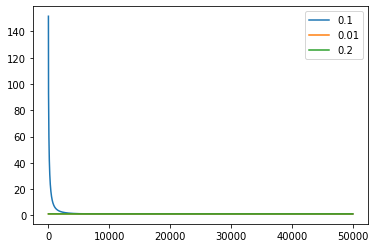

In [39]:
from matplotlib import pyplot as plt
itr_array=[]

for i in range(0,50000):
    itr_array.append(i)
    
plt.plot( itr_array, all_cost[0] )
plt.plot( itr_array, all_cost[1] )
plt.plot( itr_array, all_cost[2] )
plt.legend([x[0], x[1], x[2]], loc='upper right')

# Minimum percentage Error

In [ ]:
def per(act, pred):
    res = []
    r=act.shape[0]
    for j in range(r):
        if act[j] != 0:
            r=(act[j] - pred[j])
            res.append(r/ act[j])
        else:
            e=pred[j]
            r=np.mean(act)
            t=e/r
            res.append(t)
    return res
print(np.mean(np.abs(per(ans,predictions))*100)
    
